# IMPORT PACKAGES

In [1]:
# !pip install Sastrawi

In [1]:
# Standard Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Machine Learning Libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix

# NLP Libraries
import nltk
import re
from string import punctuation
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize

# NLP Libraries - Stemming Bahasa Indonesia - Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Save Model
import joblib

# PART 1: DATA

## 1.A) DATA PREPARATION

>### Import Data
- All text dataset are derived from several sources. All of them are Indonesian text. They are later combined into one dataset to provide variation of text that can be learned by machine.
- The sources are as follows:
  1. https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia
  2. https://github.com/indobenchmark/indonlu/tree/master/dataset/smsa_doc-sentiment-prosa
  3. https://github.com/louisowen6/NLP_bahasa_resources
- The type of the text data is varied, such as movie review, tweet about politics, instagram comment and also single words.
- They are labeled into 1 (good), 0 (neutral) and -1 (negative)
- Besides dataset, some dictionaries are also taken from those sources. Some of them are Indonesian slang words and emoji.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# directory = '/content/drive/My Drive/Colab Notebooks/COURSE - PURWADHIKA - Data Science & Machine Learning/Modul_4_Final_Project/Data/'

# df_election = pd.read_csv(directory + "dataset_2014_presidential_election.csv", encoding='iso-8859-1')
# df_ecommerce = pd.read_csv(directory + 'dataset_ecommerce_review.csv', sep=',', names=['review', 'sentiment', 'nan1', 'nan2', 'nan3'])
# df_ig_comment = pd.read_csv(directory + "dataset_komentar_instagram_cyberbullying.csv", encoding='utf-8')
# df_tv_review = pd.read_csv(directory + "dataset_tweet_sentimen_tayangan_tv.csv", encoding='utf-8')
# df_cell_provider_review = pd.read_csv(directory + 'dataset_tweet_sentiment_cellular_service_provider.csv', encoding='utf-8')
# df_movie_review = pd.read_csv(directory + "dataset_tweet_sentiment_opini_film.csv", encoding='utf-8')
# df_dki_election = pd.read_csv(directory + "dataset_tweet_sentiment_pilkada_DKI_2017.csv", encoding='utf-8')
# df_emoji = pd.read_csv(directory + "dataset_master_emoji.csv", encoding='utf-8')
# df_positive_negative_words_1 = pd.read_csv(directory + "data_positive_negative_words_1.csv", encoding='utf-8')
# df_positive_negative_words_2 = pd.read_csv(directory + "data_positive_negative_words_2.csv", encoding='utf-8')
# df_indonlu_train = pd.read_csv(directory + "dataset_indonlu_train_preprocess.tsv", sep='\t', names=['text', 'sentiment'])
# df_indonlu_valid = pd.read_csv(directory + "dataset_indonlu_valid_preprocess.tsv", sep='\t', names=['text', 'sentiment'])

df_election = pd.read_csv("Data/dataset_2014_presidential_election.csv", encoding='iso-8859-1')
df_ecommerce = pd.read_csv('Data/dataset_ecommerce_review.csv', sep=',', names=['review', 'sentiment', 'nan1', 'nan2', 'nan3'])
df_ig_comment = pd.read_csv("Data/dataset_komentar_instagram_cyberbullying.csv", encoding='utf-8')
df_tv_review = pd.read_csv("Data/dataset_tweet_sentimen_tayangan_tv.csv", encoding='utf-8')
df_cell_provider_review = pd.read_csv('Data/dataset_tweet_sentiment_cellular_service_provider.csv', encoding='utf-8')
df_movie_review = pd.read_csv("Data/dataset_tweet_sentiment_opini_film.csv", encoding='utf-8')
df_dki_election = pd.read_csv("Data/dataset_tweet_sentiment_pilkada_DKI_2017.csv", encoding='utf-8')
df_emoji = pd.read_csv("Data/dataset_master_emoji.csv", encoding='utf-8')
df_positive_negative_words_1 = pd.read_csv("Data/dataset_positive_negative_words_1.csv", encoding='utf-8')
df_positive_negative_words_2 = pd.read_csv("Data/dataset_positive_negative_words_2.csv", encoding='utf-8')
df_indonlu_train = pd.read_csv("Data/dataset_indonlu_train_preprocess.tsv", sep='\t', names=['text', 'sentiment'])
df_indonlu_valid = pd.read_csv("Data/dataset_indonlu_valid_preprocess.tsv", sep='\t', names=['text', 'sentiment'])

>### Sample of Each Dataset
- here we can look at the type of each dataset

In [4]:
# df_election
print('df_election')
display(df_election.head())

print('\ndf_ecommerce')
display(df_ecommerce.head())

print('\ndf_ig_comment')
display(df_ig_comment.head())

print('\ndf_tv_review')
display(df_tv_review.head())

print('\ndf_cell_provider_review')
display(df_cell_provider_review.head())

print('\ndf_movie_review')
display(df_movie_review.head())

print('\ndf_dki_election')
display(df_dki_election.head())

print('\ndf_emoji')
display(df_emoji.head())

print('\ndf_positive_negative_words_1')
display(df_positive_negative_words_1.head())

print('\ndf_positive_negative_words_2')
display(df_positive_negative_words_2.head())

print('\ndf_indonlu_train')
display(df_indonlu_train.head())

print('\ndf_indonlu_valid')
display(df_indonlu_valid.head())

df_election


,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,Jokowi,web,BLITAR - INDONESIA,1
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,Jokowi,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,Jokowi,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,Prabowo,web,Manado,1
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,Prabowo,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1



df_ecommerce


,review,sentiment,nan1,nan2,nan3
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1,NaN,NaN,NaN
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1,NaN,NaN,NaN
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1,NaN,NaN,NaN
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1,NaN,NaN,NaN
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1,NaN,NaN,NaN



df_ig_comment


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."



df_tv_review


,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7



df_cell_provider_review


,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>



df_movie_review


,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."



df_dki_election


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...



df_emoji


,ID,Emoji,Sentiment,Makna Emoji,Special Tag
0,1,😛,negative,Face With Stuck-Out Tongue,<FACE WITH STUCK-OUT TOUNGES>
1,2,😠,negative,Angry Face,<Angry Face>
2,3,💣,negative,Bomb,<Bomb>
3,4,💔,negative,Broken Heart,<Broken Heart>
4,5,😕,negative,Confused Face,<Confused Face>



df_positive_negative_words_1


,xx,xx.1,Isi_Tweet,xx.2,xx.3,xx xx,Source,Topic,Sentimen,xx.4
0,NaN,NaN,inkonsisten,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
1,NaN,NaN,porno,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
2,NaN,NaN,teroris,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
3,NaN,NaN,sesat,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
4,NaN,NaN,tuntut,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN



df_positive_negative_words_2


,term,Sentimen
0,diakui,positif
1,penghargaan,positif
2,kecerdasan,positif
3,kekaguman,positif
4,mengagumi,positif



df_indonlu_train


,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative



df_indonlu_valid


,text,sentiment
0,"meski masa kampanye sudah selesai , bukan bera...",neutral
1,tidak enak,negative
2,restoran ini menawarkan makanan sunda . kami m...,positive
3,lokasi di alun alun masakan padang ini cukup t...,positive
4,betapa bejad kader gerindra yang anggota dprd ...,negative


>### Sentiment Distribution Plot of Each Dataset

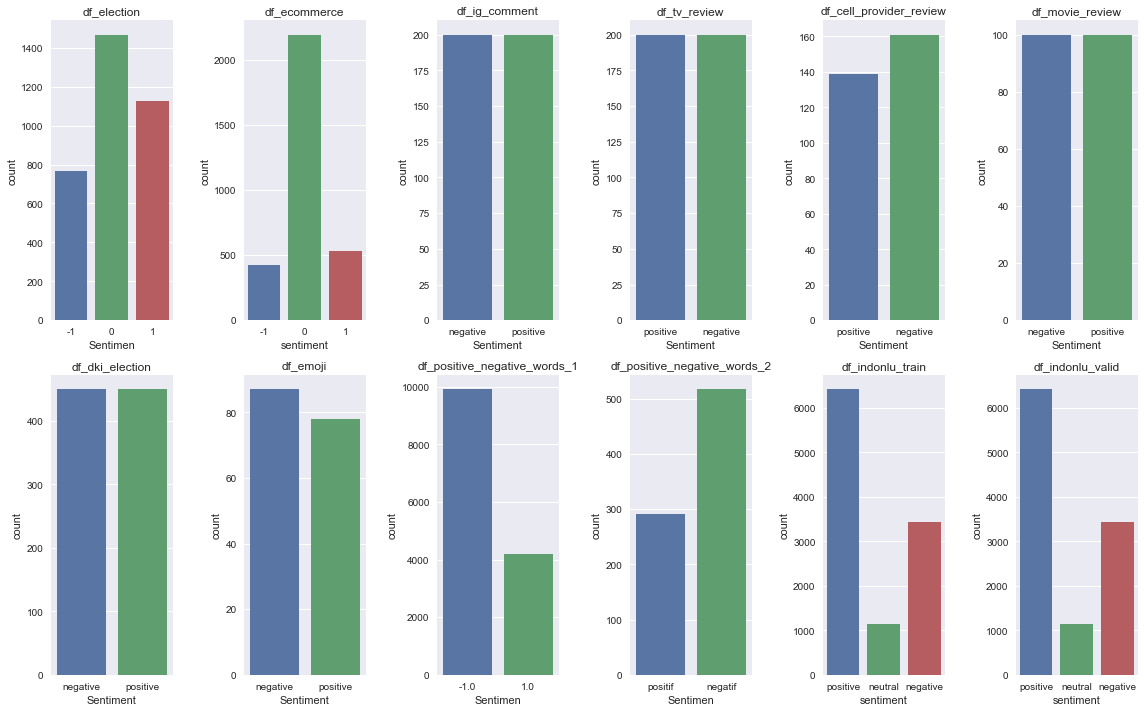

In [5]:
# 251 -> 2 rows, 5 columns, index n

plt.style.use('seaborn')
plt.figure(figsize=(16,10))
ax = plt.axes()

plt.subplot(261)
sns.countplot(x=df_election.Sentimen)
plt.title('df_election')

plt.subplot(262)
sns.countplot(x=df_ecommerce.sentiment)
plt.title('df_ecommerce')

plt.subplot(263)
sns.countplot(x=df_ig_comment.Sentiment)
plt.title('df_ig_comment')

plt.subplot(264)
sns.countplot(x=df_tv_review.Sentiment)
plt.title('df_tv_review')

plt.subplot(265)
sns.countplot(x=df_cell_provider_review.Sentiment)
plt.title('df_cell_provider_review')

plt.subplot(266)
sns.countplot(x=df_movie_review.Sentiment)
plt.title('df_movie_review')

plt.subplot(267)
sns.countplot(x=df_dki_election.Sentiment)
plt.title('df_dki_election')

plt.subplot(268)
sns.countplot(x=df_emoji.Sentiment)
plt.title('df_emoji')

plt.subplot(269)
sns.countplot(x=df_positive_negative_words_1.Sentimen)
plt.title('df_positive_negative_words_1')

plt.subplot(2,6,10)
sns.countplot(x=df_positive_negative_words_2.Sentimen)
plt.title('df_positive_negative_words_2')

plt.subplot(2,6,11)
sns.countplot(x=df_indonlu_train.sentiment)
plt.title('df_indonlu_train')

plt.subplot(2,6,12)
sns.countplot(x=df_indonlu_train.sentiment)
plt.title('df_indonlu_valid')

plt.tight_layout()
plt.show()

- There are total 12 datasets.
- Plot above describe the distribution of the sentiment
- At glance, it seems that the frequency of neutral sentiments are lesser than others
- We will see this in detail in the next part

## 1.B) Data Format Preparation
In this step, we will try to combine all the datasets into one dataset

>#### Dataframe Modification
There are some steps that will be done as follows:
- drop unused features/columns. We will only focus on columns that contain text and sentiment label
- convert Sentiment Label in text into nominal category (1, 0, -1)
- shifting the columns position so each data have the same columns order.

In [6]:
df_election_m = df_election.drop(columns = ['ID', 'Tweet_ID', 'Tanggal_Tweet', 'Kandidat', 'Aplikasi', 'Lokasi User'])
df_ecommerce_m = df_ecommerce.drop(columns = ['nan1', 'nan2', 'nan3'])


# categorical label encoding & feature position shift
sentiment_label_conversion_Sentiment = {"Sentiment": {'positive': 1, 'neutral': 0, 'negative': -1}}
sentiment_label_conversion_sentiment = {"sentiment": {'positive': 1, 'neutral': 0, 'negative': -1}}
sentiment_label_conversion_Sentimen = {"Sentimen": {'positif': 1, 'netral': 0, 'negatif': -1}}
sentiment_label_conversion_float_to_integer = {"Sentimen": {1.0: 1, 0.0: 0, -1.0: -1}}


df_ig_comment_m = df_ig_comment.drop(columns='Id') # drop unused columns
df_ig_comment_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_ig_comment_m = df_ig_comment_m.reindex(columns=['Instagram Comment Text', 'Sentiment']) # reorder the columns

df_tv_review_m = df_tv_review.drop(columns=['Id', 'Acara TV', 'Jumlah Retweet']) # drop unused columns
df_tv_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_tv_review_m = df_tv_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_cell_provider_review_m = df_cell_provider_review.drop(columns='Id') # drop unused columns
df_cell_provider_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_cell_provider_review_m = df_cell_provider_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_movie_review_m = df_movie_review.drop(columns='Id') # drop unused columns
df_movie_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_movie_review_m = df_movie_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_dki_election_m = df_dki_election.drop(columns=['Id', 'Pasangan Calon']) # drop unused columns
df_dki_election_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_dki_election_m = df_dki_election_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

def emoji_description_joiner(text):
    text_split = text.split(' ')
    text_join = "_".join(text_split)
    return text_join 

df_emoji_m = df_emoji.drop(columns=['ID', 'Emoji', 'Special Tag']) # drop unused columns
df_emoji_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_emoji_m = df_emoji_m.reindex(columns=['Makna Emoji', 'Sentiment']) # reorder the columns
df_emoji_m['Makna Emoji'] = df_emoji_m['Makna Emoji'].apply(lambda x: emoji_description_joiner(x))

df_positive_negative_words_1_m = df_positive_negative_words_1.drop(columns=['xx', 'xx.1', 'xx.2', 'xx.3', 'xx xx', 'Source', 'Topic', 'xx.4']) # drop unused columns
df_positive_negative_words_1_m.replace(sentiment_label_conversion_float_to_integer) # convert categorical sentiment label to numeric label
df_positive_negative_words_1_m['Sentimen'] = df_positive_negative_words_1_m['Sentimen'].fillna(0.0).astype(int)

df_positive_negative_words_2_m = df_positive_negative_words_2.replace(sentiment_label_conversion_Sentimen) # convert categorical sentiment label to numeric label
# df_positive_negative_words_1.Sentimen.isna().value_counts()

df_indonlu_train_m = df_indonlu_train.copy()
df_indonlu_train_m.replace(sentiment_label_conversion_sentiment, inplace=True) # convert categorical sentiment label to numeric label

df_indonlu_valid_m = df_indonlu_valid.copy()
df_indonlu_valid_m.replace(sentiment_label_conversion_sentiment, inplace=True) # convert categorical sentiment label to numeric label


In [7]:
# df_election
print('df_election')
display(df_election.head())
display(df_election_m.head())

print('\ndf_ecommerce')
display(df_ecommerce.head())
display(df_ecommerce_m.head())

print('\ndf_ig_comment')
display(df_ig_comment.head())
display(df_ig_comment_m.head())

print('\ndf_tv_review')
display(df_tv_review.head())
display(df_tv_review_m.head())

print('\ndf_cell_provider_review')
display(df_cell_provider_review.head())
display(df_cell_provider_review_m.head())

print('\ndf_movie_review')
display(df_movie_review.head())
display(df_movie_review_m.head())

print('\ndf_dki_election')
display(df_dki_election.head())
display(df_dki_election_m.head())

print('\ndf_emoji')
display(df_emoji.head())
display(df_emoji_m.head())

print('\ndf_positive_negative_words_1')
display(df_positive_negative_words_1.head())
display(df_positive_negative_words_1_m.head())

print('\ndf_positive_negative_words_2')
display(df_positive_negative_words_2.head())
display(df_positive_negative_words_2_m.head())

df_election


,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,Jokowi,web,BLITAR - INDONESIA,1
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,Jokowi,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,Jokowi,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,Prabowo,web,Manado,1
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,Prabowo,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1


,Isi_Tweet,Sentimen
0,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,1
1,"capres jokowi,wacapres abraham samad. gubernur...",1
2,"RT @RintisBautista: capres jokowi,wacapres abr...",1
3,capres ( Prabowo ) and cawapres ( jokowi ) and...,1
4,RT @Franliiiii: capres ( Prabowo ) and cawapre...,1



df_ecommerce


,review,sentiment,nan1,nan2,nan3
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1,NaN,NaN,NaN
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1,NaN,NaN,NaN
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1,NaN,NaN,NaN
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1,NaN,NaN,NaN
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1,NaN,NaN,NaN


,review,sentiment
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1



df_ig_comment


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


,Instagram Comment Text,Sentiment
0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,-1
1,Geblek lo tata...cowo bgt dibela2in balikan......,-1
2,Kmrn termewek2 skr lengket lg duhhh kok labil ...,-1
3,"Intinya kalau kesel dengan ATT nya, gausah ke ...",-1
4,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",-1



df_tv_review


,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


,Text Tweet,Sentiment
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",1
1,Selamat berbuka puasa Semoga amal ibadah hari ...,1
2,"Ada nih di trans7 hitam putih, dia dpt penghar...",1
3,selamat ya mas @adietaufan masuk hitamputih,1
4,Asiknya nonton Hitam Putih Trans7,1



df_cell_provider_review


,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


,Text Tweet,Sentiment
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,1
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",1
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,-1
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,-1
4,Selamat malam PENDUSTA <PROVIDER_NAME>,-1



df_movie_review


,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


,Text Tweet,Sentiment
0,Jelek filmnya... apalagi si ernest gak mutu bg...,-1
1,Film king Arthur ini film paling jelek dari se...,-1
2,@beexkuanlin Sepanjang film gwa berkata kasar ...,-1
3,Ane ga suka fast and furious..menurutku kok je...,-1
4,"@baekhyun36 kan gua ga tau film nya, lu bilang...",-1



df_dki_election


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


,Text Tweet,Sentiment
0,Banyak akun kloning seolah2 pendukung #agussil...,-1
1,#agussilvy bicara apa kasihan yaa...lap itu ai...,-1
2,Kalau aku sih gak nunggu hasil akhir QC tp lag...,-1
3,Kasian oh kasian dengan peluru 1milyar untuk t...,-1
4,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,-1



df_emoji


,ID,Emoji,Sentiment,Makna Emoji,Special Tag
0,1,😛,negative,Face With Stuck-Out Tongue,<FACE WITH STUCK-OUT TOUNGES>
1,2,😠,negative,Angry Face,<Angry Face>
2,3,💣,negative,Bomb,<Bomb>
3,4,💔,negative,Broken Heart,<Broken Heart>
4,5,😕,negative,Confused Face,<Confused Face>


,Makna Emoji,Sentiment
0,Face_With_Stuck-Out_Tongue,-1
1,Angry_Face,-1
2,Bomb,-1
3,Broken_Heart,-1
4,Confused_Face,-1



df_positive_negative_words_1


,xx,xx.1,Isi_Tweet,xx.2,xx.3,xx xx,Source,Topic,Sentimen,xx.4
0,NaN,NaN,inkonsisten,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
1,NaN,NaN,porno,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
2,NaN,NaN,teroris,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
3,NaN,NaN,sesat,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
4,NaN,NaN,tuntut,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN


,Isi_Tweet,Sentimen
0,inkonsisten,-1
1,porno,-1
2,teroris,-1
3,sesat,-1
4,tuntut,-1



df_positive_negative_words_2


,term,Sentimen
0,diakui,positif
1,penghargaan,positif
2,kecerdasan,positif
3,kekaguman,positif
4,mengagumi,positif


,term,Sentimen
0,diakui,1
1,penghargaan,1
2,kecerdasan,1
3,kekaguman,1
4,mengagumi,1


>#### Combining All Dataframe
- Each datasets above has already had the same columns order that are basically preceded by columns containing text and followed by columns containing sentiment
- Here, we will change each column name to have the same pattern, i.e. "text" and "sentiment" and then combine all of them into one dataframe

In [8]:
# LIST OF MODIFIED DFs before column name change
# df_election_m.head()
# df_ecommerce_m.head()
# df_ig_comment_m.head()
# df_tv_review_m.head()
# df_cell_provider_review_m.head()
# df_movie_review_m.head()
# df_dki_election_m.head()
# df_emoji_m.head()
# df_positive_negative_words_1_m.head()
# df_positive_negative_words_2_m.head()

dataframes = [df_election_m, df_ecommerce_m, df_ig_comment_m, df_tv_review_m, df_cell_provider_review_m, df_movie_review_m, df_dki_election_m, df_emoji_m, df_positive_negative_words_1_m, df_positive_negative_words_2_m]
for i in dataframes:
  print(i.columns)

Index(['Isi_Tweet', 'Sentimen'], dtype='object')
Index(['review', 'sentiment'], dtype='object')
Index(['Instagram Comment Text', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Makna Emoji', 'Sentiment'], dtype='object')
Index(['Isi_Tweet', 'Sentimen'], dtype='object')
Index(['term', 'Sentimen'], dtype='object')


In [9]:
# change the column names
dataframes = [df_indonlu_train_m, df_indonlu_valid_m, df_election_m, df_ecommerce_m, df_ig_comment_m, df_tv_review_m, df_cell_provider_review_m, df_movie_review_m, df_dki_election_m, df_emoji_m, df_positive_negative_words_1_m, df_positive_negative_words_2_m]
# len(dataframes)
for i in dataframes:
  i.columns = ['text', 'sentiment']

In [10]:
# LIST OF MODIFIED DFs after column name change
for i in dataframes:
  print(i.columns)

Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')


In [11]:
df = pd.concat(dataframes, ignore_index=True)

In [12]:
print(len(df))
display(df.sample(10))
df.sentiment.value_counts().iloc[:]

36034


,text,sentiment
27215,menjerat,-1
26418,kehancuran,-1
17524,@mataharimallcom apakah promo cashback pembaya...,0
6502,"curry rice monster curry di singapore , rasa c...",1
2810,tempat yang nyaman untuk berkumpul bersama tem...,1
32818,belajar,1
3021,"selain rasanya mengesankan , harga nya pun rel...",1
29754,membanjiri,-1
3320,1 kata yang tepat buat bakmi naripan : enak ! ...,1
26673,kuman,-1


-1    16638
 1    14454
 0     4942
Name: sentiment, dtype: int64

- Now we have one dataset that contains 36,034 data
- In the next part, we will check whether there are empty data or duplicate data to make sure that our machine learning model will learn cleaned and more meaningful text data

## 1.C) Text Preprocessing - EDA Purpose
In this step we basically want to clean the data from any word/character that sometimes doesn't have significant meaning for the context. 

It is an important step to make sure the machine learning learn the most meaningful words or characters in defining to what sentiment they are classified.
The steps are consisted of the following 8 ones, as follows:

- Step A
    1. converting to lower case
    1. remove or convert number into text
    1. remove punctuation
    1. remove white spaces
    1. converting slang words to standard words
    1. converting emoji to emoji description
    1. remove stopwords and particular words 
- Step B
    8. stemming (Indonesian affixation system)

>#### Drop Empty Data - part 1

In [13]:
df[df.text.isna()]

,text,sentiment
23234,NaN,0
26911,NaN,0


In [14]:
df.dropna(inplace=True)

In [15]:
df[df.text.isna()]

,text,sentiment


>#### Drop Duplicate Data - part 1

In [16]:
print('before drop duplicates')
print("total data:", len(df))
print("unique data:", df.text.nunique())

before drop duplicates
total data: 36032
unique data: 27617


In [17]:
df.drop_duplicates(['text'], inplace=True)
print('after drop duplicates')
print("total data:", len(df))
print("unique data:", df.text.nunique())

after drop duplicates
total data: 27617
unique data: 27617


#### Text Preprocessing

- In this case, text preprocessing is done to Indonesian text data.
- Step point 1 until 4 basically runs the standard text cleaning process that exist in all languages, including Indonesian
  1. **lowering all letters**
  1. **removing numbers**
  1. **removing punctuation**
  1. **removing white space** (non-standard white space such as tab space)
  
  
- Step point 5 to 8 are specially designed to handle Indonesian text.

  5. **slang words converter**
    
    Indonesian people often shorten the standard words or use slang words when texting or posting something in the social media such as `bkn` (bukan), `sm` (sama), `ngebully` (intimadasi), `au ah` (tidak tahu) and the likes. In this step we will replace all the slang and abbreviated words into its standard form
  6. **emoji converter**
  
    by using this converter, the idea is to replace all emojis into its description. For example, `🙇` converted into `Person_Bowing` or `😮` converted into `Face_With_Open_Mouth`

  7. **stopwords removal**
    
    we use nltk stopwords that is modified by omitting the negation words (`tidak`, `bukan`, `jangan` and `belum`) and adding some other forms found in the data such as `nya` and `yg`)

  8. **stemming**
    
    since we are treating Indonesian text, so we will use Sastrawi library for stemming process (Sastrawi only provides stemming). NLTK and other NLP Libraries do not yet have the Indonesian-based stemming.
    
    however, it should be noted that according to **INDIRA SYAWANODYA** in her [Post-Graduate Thesis](https://repository.telkomuniversity.ac.id/pustaka/147378/improvement-of-lemmatization-for-indonesian-text-document-with-spellchecker.html), `Sastrawi's running time is slow and it impacts to its low performance`.

    we will see later that it will impact also to the model performance. We can see this illustration
    - running the stemming process to 27,617 data needs more than 1 hour
    - running the model prediction of 100 new text data takes approximately up to 30 seconds

    therefore the text preprocessor will be separated from the model pipeline to make the computation efficient

In [18]:
# the element on the dictionary has been curated as follows:
# - taking out the negation in stopwords, such as "tidak", "bukan", "belum", "jangan", and their variations
# - slang words sudah ditambahkan

# stopwords
STOPWORDS = ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan', 'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti', 'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai', 'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat', 'mengingatkan', 'menginginkan', 'mengira', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab', 'menjelaskan', 'menuju', 'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan', 'menyampaikan', 'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah', 'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula', 'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris', 'nyatanya', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 'pastilah', 'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan', 'pertama', 'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa', 'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai', 'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak', 'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya', 'sebisanya', 'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh', 'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'sekarang', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sekurang-kurangnya', 'sekurangnya', 'sela', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh', 'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya', 'sementara', 'semisal', 'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya', 'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti', 'sepertinya', 'sepihak', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesampai', 'sesegera', 'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu', 'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya', 'tandas', 'tandasnya', 'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat', 'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak', 'terdahulu', 'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk', 'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah', 'tertentu', 'tertuju', 'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tiga', 'tinggi', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya', 'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 'waktu', 'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'yg', 'jd', 'nya', 'sih', 'url']

# emoji converter
emoji_dictionary = {'😛': 'Face_With_Stuck-Out_Tongue', '😠': 'Angry_Face', '💣': 'Bomb', '💔': 'Broken_Heart', '😕': 'Confused_Face', '😞': 'Disappointed_Face', '😑': 'Expressionless_Face', '😋': 'Face_Savouring_Delicious_Food', '😱': 'Face_Screaming_in_Fear', '😓': 'Face_With_Cold_Sweat', '😮': 'Face_With_Open_Mouth', '😤': 'Face_With_Steam_From_Nose', '😝': 'Face_With_Stuck-Out_Tongue_&_Closed_Eyes', '😶': 'Face_Without_Mouth', '🔥': 'Fire', '☹': 'Frowning_Face', '😬': 'Grimacing_Face', '⚡': 'High_Voltage', '🤥': 'Lying_Face', '😣': 'Persevering_Face', '🙇': 'Person_Bowing', '🏃': 'Person_Running', '🐽': 'Pig_Nose', '😡': 'Pouting_Face', '🙈': 'See-No-Evil_Monkey', '🙁': 'Slightly_Frowning_Face', '🙊': 'Speak-No-Evil_Monkey', '🤔': 'Thinking_Face', '👎': 'Thumbs_Down', '👅': 'Tongue', '😩': 'Weary_Face', '🤐': 'Zipper-Mouth_Face', '😐': 'Neutral_Face', '🙄': 'Face_With_Rolling_Eyes', '😏': 'Smirking_Face', '😥': 'Disappointed_but_Relieved_Face', '😯': 'Hushed_Face', '😪': 'Sleepy_Face', '😫': 'Tired_Face', '😴': 'Sleeping_Face', '😌': 'Relieved_Face', '😜': 'Face_With_Stuck-Out_Tongue_&_Winking_EyeNegatif', '🤤': 'Drooling_Face', '😒': 'Unamused_Face', '😔': 'Pensive_Face', '🙃': 'Upside-Down_Face', '🤑': 'Money-Mouth_Face', '😲': 'Astonished_Face', '😖': 'Confounded_Face', '😟': 'Worried_Face', '😢': 'Crying_Face', '😭': 'Loudly_Crying_Face', '😦': 'Frowning_Face_With_Open_Mouth', '😧': 'Anguished_Face', '😨': 'Fearful_Face', '😰': 'Face_With_Open_Mouth_&_Cold_Sweat', '😳': 'Flushed_Face', '😵': 'Dizzy_Face', '😷': 'Face_With_Medical_Mask', '🤒': 'Face_With_Thermometer', '🤕': 'Face_With_Head-Bandage', '🤢': 'Nauseated_Face', '🤧': 'Sneezing_Face', '🤓': 'Nerd_Face', '😈': 'Smiling_Face_With_Horns', '👿': 'Angry_Face_With_Horns', '👹': 'Ogre', '👺': 'Goblin', '💀': 'Skull', '☠': 'Skull_and_Crossbones', '👻': 'Ghost', '💩': 'Pile_of_Poo', '🙀': 'Weary_Cat_Face', '😿': 'Crying_Cat_Face', '😾': 'Pouting_Cat_Face', '🙉': 'Hear-No-Evil_Monkey', '🙎': 'Person_Pouting', '🙅': 'Person_Gesturing_No', '💁': 'Person_Tipping_Hand', '🤦': 'Person_Facepalming', '🤷': 'Person_Shrugging', '🤞': 'Crossed_Fingers', '📉': 'Chart_Decreasing', '⛔': 'No_Entry', '✖': 'Heavy_Multiplication_X', '❌': 'Cross_Mark', '❎': 'Cross_Mark_Button', '👌': 'OK_Hand', '👊': 'Oncoming_Fist', '🤘': 'Sign_of_the_Horns', '😍': 'Smiling_Face_With_Heart-Eyes', '😊': 'Smiling_Face_With_Smiling_Eyes', '👍': 'Thumbs_Up', '😹': 'Cat_Face_With_Tears_of_Joy', '👏': 'Clapping_Hands', '😘': 'Face_Blowing_a_Kiss', '😂': 'face_with_tears_of_joy', '🙏': 'Folded_Hands', '✊': 'Glory', '🌟': 'Glowing_Star', '😁': 'grining_face_with_smile_eye', '😀': 'grining_face', '💘': 'Heart_With_Arrow', '✔': 'Heavy_Check_Mark', '🤗': 'Hugging_Face', '😚': 'Kissing_Face_With_Closed_Eyes', '❤': 'lovered', '🙋': 'Person_Raising_Hand', '🙌': 'Raising_Hands', '🤣': 'Rolling_on_the_Floor_Laughing', '😆': 'Smiling_Face_With_Open_Mouth_&_Closed_Eyes', '😅': 'Smiling_Face_With_Open_Mouth_&_Cold_Sweat', '😄': 'Smiling_Face_With_Open_Mouth_&_Smiling_Eyes', '😎': 'Smiling_Face_With_Sunglasses', '🏆': 'Trophy', '✌': 'Victory_Hand', '😃': 'Smiling_Face_With_Open_Mouth', '😉': 'Wingking_Face', '😗': 'Kissing_Face', '😙': 'Kissing_Face_With_Smiling_Eyes', '☺': 'Smiling_Face', '🙂': 'Slightly_Smiling_Face', '😇': 'Smiling_Face_With_Halo', '🤠': 'Cowboy_Hat_Face', '🤡': 'Clown_Face', '😺': 'Smiling_Cat_Face_With_Open_Mouth', '😸': 'Grinning_Cat_Face_With_Smiling_Eyes', '😻': 'Smiling_Cat_Face_With_Heart-Eyes', '😼': 'Cat_Face_With_Wry_Smile', '😽': 'Kissing_Cat_Face_With_Closed_Eyes', '✈': 'Plane', '👼': 'Baby_Angel', '💆': 'Person_Getting_Massage', '🚶': 'Person_Walking', '💃': 'Woman_Dancing', '👭': 'Two_Women_Holding_Hands', '💏': 'Kiss', '💑': 'Couple_With_Heart', '💪': 'Flexed_Biceps', '🖐': 'Raised_Hand_With_Fingers_Splayed', '🤝': 'Handshake', '💋': 'Kiss_Mark', '💞': 'Revolving_Hearts', '💝': 'Heart_With_Ribbon', '💎': 'Gem_Stone', '🐥': 'Front-Facing_Baby_Chick', '💐': 'Bouquet', '🌹': 'Rose', '🌛': 'First_Quarter_Moon_With_Face', '🌜': 'Last_Quarter_Moon_With_Face', '🌝': 'Full_Moon_With_Face', '🌞': 'Sun_With_Face', '⭐': 'White_Medium_Star', '🌈': 'Rainbow', '🎀': 'Ribbon', '🎁': 'Wrapped_Gift', '💡': 'Light_Bulb', '📈': 'Chart_Increasing', '💯': 'Hundred_Points', '🆗': 'OK_Button'}

# slang words converter
slang_data = {'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 'banget', 'bg': 'abang', 'bgmn': 'bagaimana', 'bgt': 'banget', 'bijimane': 'bagaimana', 'bintal': 'bimbingan mental', 'bkl': 'akan', 'bkn': 'bukan','bknnya': 'bukannya', 'blegug': 'bodoh', 'blh': 'boleh', 'bln': 'bulan', 'blm': 'belum','blum': 'belum', 'bnci': 'benci', 'bnran': 'yang benar', 'bodor': 'lucu', 'bokap': 'ayah', 'boker': 'buang air besar', 'bokis': 'bohong', 'boljug': 'boleh juga', 'bonek': 'bocah nekat', 'boyeh': 'boleh', 'br': 'baru', 'brg': 'bareng', 'bro': 'saudara laki-laki', 'bru': 'baru', 'bs': 'bisa', 'bsen': 'bosan', 'bt': 'buat', 'btw': 'ngomong-ngomong', 'buaya': 'tidak setia', 'bubbu': 'tidur', 'bubu': 'tidur', 'bumil': 'ibu hamil', 'bw': 'bawa', 'bwt': 'buat', 'byk': 'banyak', 'byrin': 'bayarkan', 'cabal': 'sabar', 'cadas': 'keren', 'calo': 'makelar', 'can': 'belum', 'capcus': 'pergi', 'caper': 'cari perhatian', 'ce': 'cewek', 'cekal': 'cegah tangkal', 'cemen': 'penakut', 'cengengesan': 'tertawa', 'cepet': 'cepat', 'cew': 'cewek', 'chuyunk': 'sayang', 'cimeng': 'ganja', 'cipika cipiki': 'cium pipi kanan cium pipi kiri', 'ciyh': 'sih', 'ckepp': 'cakep', 'ckp': 'cakep', 'cm': 'cuma', 'cuman': 'cuma', 'cmiiw': "correct me if i'm wrong", 'cmpur': 'campur', 'cong': 'banci', 'conlok': 'cinta lokasi', 'cowwyy': 'maaf', 'cp': 'siapa', 'cpe': 'capek', 'cppe': 'capek', 'cucok': 'cocok', 'cuex': 'cuek', 'cumi': 'Cuma miscall', 'cups': 'culun', 'curanmor': 'pencurian kendaraan bermotor', 'curcol': 'curahan hati colongan', 'cwek': 'cewek', 'cyin': 'cinta', 'd': 'di', 'dah': 'deh', 'dapet': 'dapat', 'de': 'adik', 'dek': 'adik', 'demen': 'suka', 'deyh': 'deh', 'dgn': 'dengan', 'diancurin': 'dihancurkan', 'dimaafin': 'dimaafkan', 'dimintak': 'diminta', 'disono': 'di sana', 'dkt': 'dekat', 'dket': 'dekat', 'dkk': 'dan kawan-kawan', 'dll': 'dan lain-lain', 'dlu': 'dulu', 'dngn': 'dengan', 'dodol': 'bodoh', 'doku': 'uang', 'dongs': 'dong', 'dpt': 'dapat', 'dri': 'dari', 'drmn': 'darimana', 'drtd': 'dari tadi', 'dst': 'dan seterusnya', 'dtg': 'datang', 'duh': 'aduh', 'duren': 'durian', 'ed': 'edisi', 'egp': 'emang gue pikirin', 'eke': 'aku', 'elu': 'kamu', 'emangnya': 'memangnya', 'emng': 'memang', 'endak': 'tidak', 'enggak': 'tidak', 'envy': 'iri', 'ex': 'mantan', 'fax': 'facsimile', 'fifo': 'first in first out', 'folbek': 'follow back', 'fyi': 'sebagai informasi', 'ga':'tidak', 'gaada': 'tidak ada uang', 'gag': 'tidak', 'gaje': 'tidak jelas', 'gak': 'tidak', 'gak papa': 'tidak apa-apa', 'gan': 'juragan', 'gaptek': 'gagap teknologi', 'gatek': 'gagap teknologi', 'gawe': 'kerja', 'gbs': 'tidak bisa', 'gebetan': 'orang yang disuka', 'gaje': 'tidak jelas', 'geje': 'tidak jelas', 'gepeng': 'gelandangan dan pengemis', 'ghiy': 'lagi', 'gile': 'gila', 'gimana': 'bagaimana', 'gino': 'gigi nongol', 'githu': 'gitu', 'gj': 'tidak jelas', 'gmana': 'bagaimana', 'gmn': 'bagaimana', 'gn': 'begini', 'goblok': 'bodoh', 'golput': 'golongan putih', 'gowes': 'mengayuh sepeda', 'gpp': 'tidak apa-apa', 'gpny': 'tidak punya', 'gr': 'gede rasa', 'gretongan': 'gratisan', 'gtau': 'tidak tahu', 'gt': 'begitu', 'gua': 'saya', 'guoblok': 'goblok', 'gw': 'saya', 'ha': 'tertawa', 'haha': 'tertawa', 'hallow': 'halo', 'hankam': 'pertahanan dan keamanan', 'hehe': 'he', 'helo': 'halo', 'hey': 'hai', 'hlm': 'halaman', 'hny': 'hanya', 'hoax': 'isu bohong', 'hr': 'hari', 'hrus': 'harus', 'hubdar': 'perhubungan darat', 'huff': 'mengeluh', 'hum': 'rumah', 'humz': 'rumah', 'ilang': 'hilang', 'ilfil': 'tidak suka', 'imho': 'in my humble opinion', 'imoetz': 'imut', 'item': 'hitam', 'itungan': 'hitungan', 'iye': 'iya', 'ja': 'saja', 'jadiin': 'jadi', 'jaim': 'jaga image', 'jayus': 'tidak lucu', 'jdi': 'jadi', 'jem': 'jam', 'jga': 'juga', 'jgnkan': 'jangankan', 'jir': 'anjing', 'jln': 'jalan', 'jomblo': 'tidak punya pacar', 'jubir': 'juru bicara', 'jutek': 'galak', 'k': 'ke', 'kab': 'kabupaten', 'kabor': 'kabur', 'kacrut': 'kacau', 'kadiv': 'kepala divisi', 'kagak': 'tidak', 'kalo': 'kalau', 'kampret': 'sialan', 'kamtibmas': 'keamanan dan ketertiban masyarakat', 'kamuwh': 'kamu', 'kanwil': 'kantor wilayah', 'karna': 'karena', 'kasubbag': 'kepala subbagian', 'katrok': 'kampungan', 'kayanya': 'kayaknya', 'kbr': 'kabar', 'kdu': 'harus', 'kec': 'kecamatan', 'kejurnas': 'kejuaraan nasional', 'kekeuh': 'keras kepala', 'kel': 'kelurahan', 'kemaren': 'kemarin', 'kepengen': 'mau', 'kepingin': 'mau', 'kepsek': 'kepala sekolah', 'kesbang': 'kesatuan bangsa', 'kesra': 'kesejahteraan rakyat', 'ketrima': 'diterima', 'kgiatan': 'kegiatan', 'kibul': 'bohong', 'kimpoi': 'kawin', 'kl': 'kalau', 'klianz': 'kalian', 'kloter': 'kelompok terbang', 'klw': 'kalau', 'km': 'kamu', 'kmps': 'kampus', 'kmrn': 'kemarin', 'knal': 'kenal', 'knp': 'kenapa', 'kodya': 'kota madya', 'komdis': 'komisi disiplin', 'komsov': 'komunis sovyet', 'kongkow': 'kumpul bareng teman-teman', 'kopdar': 'kopi darat', 'korup': 'korupsi', 'kpn': 'kapan', 'krenz': 'keren', 'krm': 'kirim', 'kt': 'kita', 'ktmu': 'ketemu', 'ktr': 'kantor', 'kuper': 'kurang pergaulan', 'kw': 'imitasi', 'kyk': 'seperti', 'la': 'lah', 'lam': 'salam', 'lamp': 'lampiran', 'lanud': 'landasan udara', 'latgab': 'latihan gabungan', 'lebay': 'berlebihan', 'leh': 'boleh', 'lelet': 'lambat', 'lemot': 'lambat', 'lgi': 'lagi', 'lgsg': 'langsung', 'liat': 'lihat', 'litbang': 'penelitian dan pengembangan', 'lmyn': 'lumayan', 'lo': 'kamu', 'loe': 'kamu', 'lola': 'lambat berfikir', 'louph': 'cinta', 'low': 'kalau', 'lp': 'lupa', 'luber': 'langsung, umum, bebas, dan rahasia', 'luchuw': 'lucu', 'lum': 'belum', 'luthu': 'lucu', 'lwn': 'lawan', 'maacih': 'terima kasih', 'mabal': 'bolos', 'macem': 'macam', 'macih': 'masih', 'maem': 'makan', 'magabut': 'makan gaji buta', 'maho': 'homo', 'mak jang': 'kaget', 'maksain': 'memaksa', 'malem': 'malam', 'mam': 'makan', 'maneh': 'kamu', 'maniez': 'manis', 'mao': 'mau', 'masukin': 'masukkan', 'melu': 'ikut', 'mepet': 'dekat sekali', 'mgu': 'minggu', 'migas': 'minyak dan gas bumi', 'mikol': 'minuman beralkohol', 'miras': 'minuman keras', 'mlah': 'malah', 'mngkn': 'mungkin', 'mo': 'mau', 'mokad': 'mati', 'moso': 'masa', 'mpe': 'sampai', 'msk': 'masuk', 'mslh': 'masalah', 'mt': 'makan teman', 'mubes': 'musyawarah besar', 'mulu': 'melulu', 'mumpung': 'selagi', 'munas': 'musyawarah nasional', 'muntaber': 'muntah dan berak', 'musti': 'mesti', 'muupz': 'maaf', 'mw': 'now watching', 'n': 'dan', 'nanam': 'menanam', 'nanya': 'bertanya', 'napa': 'kenapa', 'napi': 'narapidana', 'napza': 'narkotika, alkohol, psikotropika, dan zat adiktif ', 'narkoba': 'narkotika, psikotropika, dan obat terlarang', 'nasgor': 'nasi goreng', 'nda': 'tidak', 'ndiri': 'sendiri', 'ne': 'ini', 'nekolin': 'neokolonialisme', 'nembak': 'menyatakan cinta', 'ngabuburit': 'menunggu berbuka puasa', 'ngaku': 'mengaku', 'ngambil': 'mengambil', 'nganggur': 'tidak punya pekerjaan', 'ngapah': 'kenapa', 'ngaret': 'terlambat', 'ngasih': 'memberikan', 'ngebandel': 'berbuat bandel', 'ngegosip': 'bergosip', 'ngeklaim': 'mengklaim', 'ngeksis': 'menjadi eksis', 'ngeles': 'berkilah', 'ngelidur': 'menggigau', 'ngerampok': 'merampok', 'ngga': 'tidak', 'ngibul': 'berbohong', 'ngiler': 'mau', 'ngiri': 'iri', 'ngisiin': 'mengisikan', 'ngmng': 'bicara', 'ngomong': 'bicara', 'ngubek2': 'mencari-cari', 'ngurus': 'mengurus', 'nie': 'ini', 'nih': 'ini', 'niyh': 'nih', 'nmr': 'nomor', 'nntn': 'nonton', 'nobar': 'nonton bareng', 'np': 'now playing', 'ntar': 'nanti', 'ntn': 'nonton', 'numpuk': 'bertumpuk', 'nutupin': 'menutupi', 'nyari': 'mencari', 'nyekar': 'menyekar', 'nyicil': 'mencicil', 'nyoblos': 'mencoblos', 'nyokap': 'ibu', 'ogah': 'tidak mau', 'ol': 'online', 'ongkir': 'ongkos kirim', 'oot': 'out of topic', 'org2': 'orang-orang', 'ortu': 'orang tua', 'otda': 'otonomi daerah', 'otw': 'on the way, sedang di jalan', 'pacal': 'pacar', 'pake': 'pakai', 'pala': 'kepala', 'pansus': 'panitia khusus', 'parpol': 'partai politik', 'pasutri': 'pasangan suami istri', 'pd': 'pada', 'pede': 'percaya diri', 'pelatnas': 'pemusatan latihan nasional', 'pemda': 'pemerintah daerah', 'pemkot': 'pemerintah kota', 'pemred': 'pemimpin redaksi', 'penjas': 'pendidikan jasmani', 'perda': 'peraturan daerah', 'perhatiin': 'perhatikan', 'pesenan': 'pesanan', 'pgang': 'pegang', 'pi': 'tapi', 'pilkada': 'pemilihan kepala daerah', 'pisan': 'sangat', 'pk': 'penjahat kelamin', 'plg': 'paling', 'pmrnth': 'pemerintah', 'polantas': 'polisi lalu lintas', 'ponpes': 'pondok pesantren', 'pp': 'pulang pergi', 'prg': 'pergi', 'prnh': 'pernah', 'psen': 'pesan', 'pst': 'pasti', 'pswt': 'pesawat', 'pw': 'posisi nyaman', 'qmu': 'kamu', 'rakor': 'rapat koordinasi', 'ranmor': 'kendaraan bermotor', 're': 'reply', 'ref': 'referensi', 'rehab': 'rehabilitasi', 'rempong': 'sulit', 'repp': 'balas', 'restik': 'reserse narkotika', 'rhs': 'rahasia', 'rmh': 'rumah', 'ru': 'baru', 'ruko': 'rumah toko', 'rusunawa': 'rumah susun sewa', 'ruz': 'terus', 'saia': 'saya', 'salting': 'salah tingkah', 'sampe': 'sampai', 'samsek': 'sama sekali', 'sapose': 'siapa', 'satpam': 'satuan pengamanan', 'sbb': 'sebagai berikut', 'sbg': 'sebagai', 'sbh': 'sebuah', 'sbnrny': 'sebenarnya', 'scr': 'secara', 'sdgkn': 'sedangkan', 'sdkt': 'sedikit', 'se7': 'setuju', 'sebelas dua belas': 'mirip', 'sembako': 'sembilan bahan pokok', 'sempet': 'sempat', 'sendratari': 'seni drama tari', 'sgt': 'sangat', 'shg': 'sehingga', 'siech': 'sih', 'sikon': 'situasi dan kondisi', 'sinetron': 'sinema elektronik', 'siramin': 'siramkan', 'sj': 'saja', 'skalian': 'sekalian', 'sklh': 'sekolah', 'skt': 'sakit', 'slesai': 'selesai', 'sll': 'selalu', 'slma': 'selama', 'slsai': 'selesai', 'smpt': 'sempat', 'smw': 'semua', 'sndiri': 'sendiri', 'soljum': 'sholat jumat', 'songong': 'sombong', 'sory': 'maaf', 'sosek': 'sosial-ekonomi', 'sotoy': 'sok tahu', 'spa': 'siapa', 'sppa': 'siapa', 'spt': 'seperti', 'srtfkt': 'sertifikat', 'stiap': 'setiap', 'stlh': 'setelah', 'suk': 'masuk', 'sumpek': 'sempit', 'syg': 'sayang', 't4': 'tempat', 'tajir': 'kaya', 'tau': 'tahu', 'taw': 'tahu', 'td': 'tadi', 'tdk': 'tidak', 'teh': 'kakak perempuan', 'telat': 'terlambat', 'telmi': 'telat berpikir', 'temen': 'teman', 'tengil': 'menyebalkan', 'tepar': 'terkapar', 'tggu': 'tunggu', 'tgu': 'tunggu', 'thankz': 'terima kasih', 'thn': 'tahun', 'tilang': 'bukti pelanggaran', 'tipiwan': 'TvOne', 'tks': 'terima kasih', 'tlp': 'telepon', 'tls': 'tulis', 'tmbah': 'tambah', 'tmen2': 'teman-teman', 'tmpah': 'tumpah', 'tmpt': 'tempat', 'tngu': 'tunggu', 'tnyta': 'ternyata', 'tokai': 'tai', 'toserba': 'toko serba ada', 'tpi': 'tapi', 'trdhulu': 'terdahulu', 'trima': 'terima kasih', 'trm': 'terima', 'trs': 'terus', 'trutama': 'terutama', 'ts': 'penulis', 'tst': 'tahu sama tahu', 'ttg': 'tentang', 'tuch': 'tuh', 'tuir': 'tua', 'tw': 'tahu', 'u': 'kamu', 'ud': 'sudah', 'udah': 'sudah', 'ujg': 'ujung', 'ul': 'ulangan', 'unyu': 'lucu', 'uplot': 'unggah', 'urang': 'saya', 'usah': 'perlu', 'utk': 'untuk', 'valas': 'valuta asing', 'w/': 'dengan', 'wadir': 'wakil direktur', 'wamil': 'wajib militer', 'warkop': 'warung kopi', 'warteg': 'warung tegal', 'wat': 'buat', 'wkt': 'waktu', 'wtf': 'what the fuck', 'xixixi': 'tertawa', 'ya': 'iya', 'yap': 'iya', 'yaudah': 'ya sudah', 'yawdah': 'ya sudah', 'yg': 'yang', 'yl': 'yang lain', 'yo': 'iya', 'yowes': 'ya sudah', 'yup': 'iya', '7an': 'tujuan', 'ababil': 'abg labil', 'acc': 'accord', 'adlah': 'adalah', 'adoh': 'aduh', 'aha': 'tertawa', 'aing': 'saya', 'aja': 'saja', 'ajj': 'saja', 'aka': 'dikenal juga sebagai', 'akko': 'aku', 'akku': 'aku', 'akyu': 'aku', 'aljasa': 'asal jadi saja', 'ama': 'sama', 'ambl': 'ambil', 'anjir': 'anjing', 'ank': 'anak', 'ap': 'apa', 'apaan': 'apa', 'ape': 'apa', 'aplot': 'unggah', 'apva': 'apa', 'aqu': 'aku', 'asap': 'sesegera mungkin', 'aseek': 'asyik', 'asek': 'asyik', 'aseknya': 'asyiknya', 'asoy': 'asyik', 'astrojim': 'astagfirullahaladzim', 'ath': 'kalau begitu', 'atuh': 'kalau begitu', 'ava': 'avatar', 'aws': 'awas', 'ayang': 'sayang', 'ayok': 'ayo', 'bacot': 'banyak bicara', 'bales': 'balas', 'bangdes': 'pembangunan desa', 'bangkotan': 'tua', 'banpres': 'bantuan presiden', 'bansarkas': 'bantuan sarana kesehatan', 'bazis': 'badan amal, zakat, infak, dan sedekah', 'bcoz': 'karena', 'beb': 'sayang', 'bejibun': 'banyak', 'belom': 'belum', 'bener': 'benar', 'ber2': 'berdua', 'berdikari': 'berdiri di atas kaki sendiri', 'bet': 'banget', 'beti': 'beda tipis', 'beut': 'banget', 'bgd': 'banget', 'bgs': 'bagus', 'bhubu': 'tidur', 'bimbuluh': 'bimbingan dan penyuluhan', 'bisi': 'kalau-kalau', 'bkn': 'bukan', 'bl': 'beli', 'blg': 'bilang', 'blm': 'belum', 'bls': 'balas', 'bnchi': 'benci', 'bngung': 'bingung', 'bnyk': 'banyak', 'bohay': 'badan aduhai', 'bokep': 'porno', 'bokin': 'pacar', 'bole': 'boleh', 'bolot': 'bodoh', 'bonyok': 'ayah ibu', 'bpk': 'bapak', 'brb': 'segera kembali', 'brngkt': 'berangkat', 'brp': 'berapa', 'brur': 'saudara laki-laki', 'bsa': 'bisa', 'bsk': 'besok', 'bu_bu': 'tidur', 'bubarin': 'bubarkan', 'buber': 'buka bersama', 'bujubune': 'luar biasa', 'buser': 'buru sergap', 'bwhn': 'bawahan', 'byar': 'bayar', 'byr': 'bayar', 'c8': 'chat', 'cabut': 'pergi', 'caem': 'cakep', 'cama-cama': 'sama-sama', 'cangcut': 'celana dalam', 'cape': 'capek', 'caur': 'jelek', 'cekak': 'tidak ada uang', 'cekidot': 'coba lihat', 'cemplungin': 'cemplungkan', 'ceper': 'pendek', 'ceu': 'kakak perempuan', 'cewe': 'cewek', 'cibuk': 'sibuk', 'cin': 'cinta', 'ciye': 'cie', 'ckck': 'ck', 'clbk': 'cinta lama bersemi kembali', 'cmpr': 'campur', 'cnenk': 'senang', 'congor': 'mulut', 'cow': 'cowok', 'coz': 'karena', 'cpa': 'siapa', 'gokil': 'gila', 'gombal': 'suka merayu', 'gpl': 'tidak pakai lama', 'gpp': 'tidak apa-apa', 'gretong': 'gratis', 'gt': 'begitu', 'gtw': 'tidak tahu', 'gue': 'saya', 'guys': 'teman-teman', 'gws': 'cepat sembuh', 'haghaghag': 'tertawa', 'hakhak': 'tertawa', 'handak': 'bahan peledak', 'hansip': 'pertahanan sipil', 'hellow': 'halo', 'helow': 'halo', 'hi': 'hai', 'hlng': 'hilang', 'hnya': 'hanya', 'houm': 'rumah', 'hrs': 'harus', 'hubad': 'hubungan angkatan darat', 'hubla': 'perhubungan laut', 'huft': 'mengeluh', 'humas': 'hubungan masyarakat', 'idk': 'saya tidak tahu', 'ilfeel': 'tidak suka', 'imba': 'jago sekali', 'imoet': 'imut', 'info': 'informasi', 'itung': 'hitung', 'isengin': 'bercanda', 'iyala': 'iya lah', 'iyo': 'iya', 'jablay': 'jarang dibelai', 'jadul': 'jaman dulu', 'jancuk': 'anjing', 'jd': 'jadi', 'jdikan': 'jadikan', 'jg': 'juga', 'jgn': 'jangan', 'jijay': 'jijik', 'jkt': 'jakarta', 'jnj': 'janji', 'jth': 'jatuh', 'jurdil': 'jujur adil', 'jwb': 'jawab', 'ka': 'kakak', 'kabag': 'kepala bagian', 'kacian': 'kasihan', 'kadit': 'kepala direktorat', 'kaga': 'tidak', 'kaka': 'kakak', 'kamtib': 'keamanan dan ketertiban', 'kamuh': 'kamu', 'kamyu': 'kamu', 'kapt': 'kapten', 'kasat': 'kepala satuan', 'kasubbid': 'kepala subbidang', 'kau': 'kamu', 'kbar': 'kabar', 'kcian': 'kasihan', 'keburu': 'terlanjur', 'kedubes': 'kedutaan besar', 'kek': 'seperti', 'keknya': 'kayaknya', 'keliatan': 'kelihatan', 'keneh': 'masih', 'kepikiran': 'terpikirkan', 'kepo': 'mau tahu urusan orang', 'kere': 'tidak punya uang', 'kesian': 'kasihan', 'ketauan': 'ketahuan', 'keukeuh': 'keras kepala', 'khan': 'kan', 'kibus': 'kaki busuk', 'kk': 'kakak', 'klian': 'kalian', 'klo': 'kalau', 'kluarga': 'keluarga', 'klwrga': 'keluarga', 'kmari': 'kemari', 'kmpus': 'kampus', 'kn': 'kan', 'knl': 'kenal', 'knpa': 'kenapa', 'kog': 'kok', 'kompi': 'komputer', 'komtiong': 'komunis Tiongkok', 'konjen': 'konsulat jenderal', 'koq': 'kok', 'kpd': 'kepada', 'kptsan': 'keputusan', 'krik': 'garing', 'krn': 'karena', 'ktauan': 'ketahuan', 'ktny': 'katanya', 'kudu': 'harus', 'kuq': 'kok', 'ky': 'seperti', 'kykny': 'kayanya', 'laka': 'kecelakaan', 'lambreta': 'lambat', 'lansia': 'lanjut usia', 'lapas': 'lembaga pemasyarakatan', 'lbur': 'libur', 'lekong': 'laki-laki', 'lg': 'lagi', 'lgkp': 'lengkap', 'lht': 'lihat', 'linmas': 'perlindungan masyarakat', 'lmyan': 'lumayan', 'lngkp': 'lengkap', 'loch': 'loh', 'lol': 'tertawa', 'lom': 'belum', 'loupz': 'cinta', 'lowh': 'kamu', 'lu': 'kamu', 'luchu': 'lucu', 'luff': 'cinta', 'luph': 'cinta', 'lw': 'kamu', 'lwt': 'lewat', 'maaciw': 'terima kasih', 'mabes': 'markas besar', 'macem-macem': 'macam-macam', 'madesu': 'masa depan suram', 'maen': 'main', 'mahatma': 'maju sehat bersama', 'mak': 'ibu', 'makasih': 'terima kasih', 'malah': 'bahkan', 'malu2in': 'memalukan', 'mamz': 'makan', 'manies': 'manis', 'mantep': 'mantap', 'markus': 'makelar kasus', 'mba': 'mbak', 'mending': 'lebih baik', 'mgkn': 'mungkin', 'mhn': 'mohon', 'miker': 'minuman keras', 'milis': 'mailing list', 'mksd': 'maksud', 'mls': 'malas', 'mnt': 'minta', 'moge': 'motor gede', 'mokat': 'mati', 'mosok': 'masa', 'msh': 'masih', 'mskpn': 'meskipun', 'msng2': 'masing-masing', 'muahal': 'mahal', 'muker': 'musyawarah kerja', 'mumet': 'pusing', 'muna': 'munafik', 'munaslub': 'musyawarah nasional luar biasa', 'musda': 'musyawarah daerah', 'muup': 'maaf', 'muuv': 'maaf', 'nal': 'kenal', 'nangis': 'menangis', 'naon': 'apa', 'napol': 'narapidana politik', 'naq': 'anak', 'narsis': 'bangga pada diri sendiri', 'nax': 'anak', 'ndak': 'tidak', 'ndut': 'gendut', 'nekolim': 'neokolonialisme', 'nelfon': 'menelepon', 'ngabis2in': 'menghabiskan', 'ngakak': 'tertawa', 'ngambek': 'marah', 'ngampus': 'pergi ke kampus', 'ngantri': 'mengantri', 'ngapain': 'sedang apa', 'ngaruh': 'berpengaruh', 'ngawur': 'berbicara sembarangan', 'ngeceng': 'kumpul bareng-bareng', 'ngeh': 'sadar', 'ngekos': 'tinggal di kos', 'ngelamar': 'melamar', 'ngeliat': 'melihat', 'ngemeng': 'bicara terus-terusan', 'ngerti': 'mengerti', 'nggak': 'tidak', 'ngikut': 'ikut', 'nginep': 'menginap', 'ngisi': 'mengisi', 'ngmg': 'bicara', 'ngocol': 'lucu', 'ngomongin': 'membicarakan', 'ngumpul': 'berkumpul', 'ni': 'ini', 'nyasar': 'tersesat', 'nyariin': 'mencari', 'nyiapin': 'mempersiapkan', 'nyiram': 'menyiram', 'nyok': 'ayo', 'o/': 'oleh', 'ok': 'ok', 'priksa': 'periksa', 'pro': 'profesional', 'psn': 'pesan', 'psti': 'pasti', 'puanas': 'panas', 'qmo': 'kamu', 'qt': 'kita', 'rame': 'ramai', 'raskin': 'rakyat miskin', 'red': 'redaksi', 'reg': 'register', 'rejeki': 'rezeki', 'renstra': 'rencana strategis', 'reskrim': 'reserse kriminal', 'sni': 'sini', 'somse': 'sombong sekali', 'sorry': 'maaf', 'sosbud': 'sosial-budaya', 'sospol': 'sosial-politik', 'sowry': 'maaf', 'spd': 'sepeda', 'sprti': 'seperti', 'spy': 'supaya', 'stelah': 'setelah', 'subbag': 'subbagian', 'sumbangin': 'sumbangkan', 'sy': 'saya', 'syp': 'siapa', 'tabanas': 'tabungan pembangunan nasional', 'tar': 'nanti', 'taun': 'tahun', 'tawh': 'tahu', 'tdi': 'tadi', 'te2p': 'tetap', 'tekor': 'rugi', 'telkom': 'telekomunikasi', 'telp': 'telepon', 'temen2': 'teman-teman', 'tengok': 'menjenguk', 'terbitin': 'terbitkan', 'tgl': 'tanggal', 'thanks': 'terima kasih', 'thd': 'terhadap', 'thx': 'terima kasih', 'tipi': 'TV', 'tkg': 'tukang', 'tll': 'terlalu', 'tlpn': 'telepon', 'tman': 'teman', 'tmbh': 'tambah', 'tmn2': 'teman-teman', 'tmph': 'tumpah', 'tnda': 'tanda', 'tnh': 'tanah', 'togel': 'toto gelap', 'tp': 'tapi', 'tq': 'terima kasih', 'trgntg': 'tergantung', 'trims': 'terima kasih', 'cb': 'coba', 'y': 'ya', 'munfik': 'munafik', 'reklamuk': 'reklamasi', 'sma': 'sama', 'tren': 'trend', 'ngehe': 'kesal', 'mz': 'mas', 'analisise': 'analisis', 'sadaar': 'sadar', 'sept': 'september', 'nmenarik': 'menarik', 'zonk': 'bodoh', 'rights': 'benar', 'simiskin': 'miskin', 'ngumpet': 'sembunyi', 'hardcore': 'keras', 'akhirx': 'akhirnya', 'solve': 'solusi', 'watuk': 'batuk', 'ngebully': 'intimidasi', 'masy': 'masyarakat', 'still': 'masih', 'tauk': 'tahu', 'mbual': 'bual', 'tioghoa': 'tionghoa', 'ngentotin': 'senggama', 'kentot': 'senggama', 'faktakta': 'fakta', 'sohib': 'teman', 'rubahnn': 'rubah', 'trlalu': 'terlalu', 'nyela': 'cela', 'heters': 'pembenci', 'nyembah': 'sembah', 'most': 'paling', 'ikon': 'lambang', 'light': 'terang', 'pndukung': 'pendukung', 'setting': 'atur', 'seting': 'akting', 'next': 'lanjut', 'waspadalah': 'waspada', 'gantengsaya': 'ganteng', 'parte': 'partai', 'nyerang': 'serang', 'nipu': 'tipu', 'ktipu': 'tipu', 'jentelmen': 'berani', 'buangbuang': 'buang', 'tsangka': 'tersangka', 'kurng': 'kurang', 'ista': 'nista', 'less': 'kurang', 'koar': 'teriak', 'paranoid': 'takut', 'problem': 'masalah', 'tahi': 'kotoran', 'tirani': 'tiran', 'tilep': 'tilap', 'happy': 'bahagia', 'tak': 'tidak', 'penertiban': 'tertib', 'uasai': 'kuasa', 'mnolak': 'tolak', 'trending': 'trend', 'taik': 'tahi', 'wkwkkw': 'tertawa', 'ahokncc': 'ahok', 'istaa': 'nista', 'benarjujur': 'jujur', 'mgkin': 'mungkin'}

In [19]:
# 1) Converting to Lower Case
def to_lower(text):
    return text.lower()

# 2) remove or convert number into text
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

# 3) remove punctuation
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

# 4) remove white spaces
def remove_white_space(text):
    return " ".join(text.split())

# 5) converting slang words to standard words
def slang_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(slang_data.keys()):
            text_split[text_split.index(i)] = slang_data[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 6) converting emoji to description
def emoji_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(emoji_dictionary.keys()):
            text_split[text_split.index(i)] = emoji_dictionary[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 7) remove stopwords and particular words 
def remove_stopwords(sentence):
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in STOPWORDS])

# 8) stemming text
def stem(text):
    stemmed_text = stemmer.stem(text)
    return stemmed_text

In [20]:
pd.options.display.max_colwidth = None

# print(len(df))
# df['text_prep1_to_lower'] = df.text.apply(lambda x: to_lower(x))
# df['text_prep2_remove_numbers'] = df['text_prep1_to_lower'].apply(lambda x: remove_numbers(x))
# df['text_prep3_remove_punct'] = df['text_prep2_remove_numbers'].apply(lambda x: remove_punct(x))
# df['text_prep4_remove_white_space'] = df['text_prep3_remove_punct'].apply(lambda x: remove_white_space(x))
# df['text_prep5_convert_slang_words'] = df['text_prep4_remove_white_space'].apply(lambda x: slang_converter(x))
# df['text_prep6_convert_emoji'] = df['text_prep5_convert_slang_words'].apply(lambda x: emoji_converter(x))
# df['text_prep7_remove_stopwords'] = df['text_prep6_convert_emoji'].apply(lambda x: remove_stopwords(x))
# df['text_prep8_stemmed'] = df.text_prep7_remove_stopwords.apply(lambda x: stem(x))

# display(df.sample(20))
# len(df)

In [21]:
# df = pd.read_csv(directory + 'text_preprocessed_27617.csv')
df = pd.read_csv("Data/text_preprocessed_27617.csv")
df.sample(5)

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed
2904,"saya tidak respek sama rumah makan yang sabun cuci tangan nya sunlight sudah habis tapi tetap ditambahi air , lunyu tangan ku :",-1,"saya tidak respek sama rumah makan yang sabun cuci tangan nya sunlight sudah habis tapi tetap ditambahi air , lunyu tangan ku :","saya tidak respek sama rumah makan yang sabun cuci tangan nya sunlight sudah habis tapi tetap ditambahi air , lunyu tangan ku :",saya tidak respek sama rumah makan yang sabun cuci tangan nya sunlight sudah habis tapi tetap ditambahi air lunyu tangan ku,saya tidak respek sama rumah makan yang sabun cuci tangan nya sunlight sudah habis tapi tetap ditambahi air lunyu tangan ku,saya tidak respek sama rumah makan yang sabun cuci tangan nya sunlight sudah habis tapi tetap ditambahi air lunyu tangan ku,saya tidak respek sama rumah makan yang sabun cuci tangan nya sunlight sudah habis tapi tetap ditambahi air lunyu tangan ku,tidak respek rumah makan sabun cuci tangan sunlight habis ditambahi air lunyu tangan ku,tidak respek rumah makan sabun cuci tangan sunlight habis tambah air lunyu tangan ku
5145,pilihan shabu nya banyak sekali . ada juga menu lainnya selain shabu . makanan penutup nya yang es delima enak .,1,pilihan shabu nya banyak sekali . ada juga menu lainnya selain shabu . makanan penutup nya yang es delima enak .,pilihan shabu nya banyak sekali . ada juga menu lainnya selain shabu . makanan penutup nya yang es delima enak .,pilihan shabu nya banyak sekali ada juga menu lainnya selain shabu makanan penutup nya yang es delima enak,pilihan shabu nya banyak sekali ada juga menu lainnya selain shabu makanan penutup nya yang es delima enak,pilihan shabu nya banyak sekali ada juga menu lainnya selain shabu makanan penutup nya yang es delima enak,pilihan shabu nya banyak sekali ada juga menu lainnya selain shabu makanan penutup nya yang es delima enak,pilihan shabu menu shabu makanan penutup es delima enak,pilih shabu menu shabu makan tutup es delima enak
27493,tangan ke bawah,1,tangan ke bawah,tangan ke bawah,tangan ke bawah,tangan ke bawah,tangan ke bawah,tangan ke bawah,tangan,tangan
8450,setiap kali ke sini membawa saya untuk tidak mau pulang cepat . pelayanan yang ramah dan tempat yang nyaman .,1,setiap kali ke sini membawa saya untuk tidak mau pulang cepat . pelayanan yang ramah dan tempat yang nyaman .,setiap kali ke sini membawa saya untuk tidak mau pulang cepat . pelayanan yang ramah dan tempat yang nyaman .,setiap kali ke sini membawa saya untuk tidak mau pulang cepat pelayanan yang ramah dan tempat yang nyaman,setiap kali ke sini membawa saya untuk tidak mau pulang cepat pelayanan yang ramah dan tempat yang nyaman,setiap kali ke sini membawa saya untuk tidak mau pulang cepat pelayanan yang ramah dan tempat yang nyaman,setiap kali ke sini membawa saya untuk tidak mau pulang cepat pelayanan yang ramah dan tempat yang nyaman,kali membawa tidak pulang cepat pelayanan ramah nyaman,kali bawa tidak pulang cepat layan ramah nyaman
17160,@eleveniaid siang kak @nita_kiaranitaa mhn maaf utk kndalanya utk no.order 201604150771619 jika kami bantu cek utk no.order tsb *cont,0,@eleveniaid siang kak @nita_kiaranitaa mhn maaf utk kndalanya utk no.order 201604150771619 jika kami bantu cek utk no.order tsb *cont,@eleveniaid siang kak @nita_kiaranitaa mhn maaf utk kndalanya utk no.order jika kami bantu cek utk no.order tsb *cont,eleveniaid siang kak nitakiaranitaa mhn maaf utk kndalanya utk noorder jika kami bantu cek utk noorder tsb cont,eleveniaid siang kak nitakiaranitaa mhn maaf utk kndalanya utk noorder jika kami bantu cek utk noorder tsb cont,eleveniaid siang kak nitakiaranitaa mohon maaf untuk kndalanya untuk noorder jika kami bantu cek untuk noorder tsb cont,eleveniaid siang kak nitakiaranitaa mohon maaf untuk kndalanya untuk noorder jika kami bantu cek u

## 1.D) Handle Empty & Duplicate Data - Part 2

>#### Drop Empty Data - part 2

In [22]:
df[df.text_prep8_stemmed.isna()]

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed
2260,masalah,-1,masalah,masalah,masalah,masalah,masalah,masalah,NaN,NaN
3452,yakin,1,yakin,yakin,yakin,yakin,yakin,yakin,NaN,NaN
8382,baik,1,baik,baik,baik,baik,baik,baik,NaN,NaN
20584,hanya,-1,hanya,hanya,hanya,hanya,hanya,hanya,NaN,NaN
20585,cuma,-1,cuma,cuma,cuma,cuma,cuma,cuma,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
27491,tampak,1,tampak,tampak,tampak,tampak,tampak,tampak,NaN,NaN
27505,tepat,1,tepat,tepat,tepat,tepat,tepat,tepat,NaN,NaN
27506,tepat pada waktunya,1,tepat pada waktunya,tepat pada waktunya,tepat pada waktunya,tepat pada waktunya,tepat pada waktunya,tepat pada waktunya,NaN,NaN
27507,tepat waktu,1,tepat waktu,tepat waktu,tepat waktu,tepat waktu,tepat waktu,tepat waktu,NaN,NaN


In [23]:
print('before drop empty data: ', len(df))
df.dropna(inplace=True)
print('after drop empty data: ', len(df))

before drop empty data:  27617
after drop empty data:  27455


In [24]:
df[df.text_prep8_stemmed.isna()]

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed


>#### Drop Duplicate Data

In [25]:
print('before drop duplicates')
print("total data:", len(df))
print("unique data:", df.text_prep8_stemmed.nunique())

before drop duplicates
total data: 27455
unique data: 24338


In [26]:
df.drop_duplicates(['text_prep8_stemmed'], inplace=True)
print('after drop duplicates')
print("total data:", len(df))
print("unique data:", df.text_prep8_stemmed.nunique())

after drop duplicates
total data: 24338
unique data: 24338


- After checking the stemmed data, first we found there are 162 empty data. We drop it with `dropna()`
- Then, we also found that there many duplicate data. So we just use `drop_duplicates` in order to have only unique data
- Finally, we now have 24,338 data (previously 36,032). There are about 12,000 data are cleaned
- Now, the data is ready to be passed on to Training Process

## 1.E) Final Dataset
This is the end of Part 1: Data Preparation.

By passing this part, we finally have the data that is ready to be processed to the next part.

PS: 
for model development, we  use the cleaned data `df['text_prep8_stemmed']`

In [27]:
pd.DataFrame({'Item': ["amount of data"], 'Remark': [len(df)]})

,Item,Remark
0,amount of data,24338


In [28]:
# sample of Data
df.sample(5)

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed
18490,"Pembagian suaranya pas bnget,pecah suaranya jg cakep",1,"pembagian suaranya pas bnget,pecah suaranya jg cakep","pembagian suaranya pas bnget,pecah suaranya jg cakep",pembagian suaranya pas bngetpecah suaranya jg cakep,pembagian suaranya pas bngetpecah suaranya jg cakep,pembagian suaranya pas bngetpecah suaranya juga cakep,pembagian suaranya pas bngetpecah suaranya juga cakep,pembagian suaranya pas bngetpecah suaranya cakep,bagi suara pas bngetpecah suara cakep
15217,"Capres Dahlan Iskan Rilis Film ""Spatu skets Dahlan"" @KodratArief @HelmiHelmimoze @blade_repsol @Yettidewi @BobbyEndhut @IniBang_Is",0,"capres dahlan iskan rilis film ""spatu skets dahlan"" @kodratarief @helmihelmimoze @blade_repsol @yettidewi @bobbyendhut @inibang_is","capres dahlan iskan rilis film ""spatu skets dahlan"" @kodratarief @helmihelmimoze @blade_repsol @yettidewi @bobbyendhut @inibang_is",capres dahlan iskan rilis film spatu skets dahlan kodratarief helmihelmimoze bladerepsol yettidewi bobbyendhut inibangis,capres dahlan iskan rilis film spatu skets dahlan kodratarief helmihelmimoze bladerepsol yettidewi bobbyendhut inibangis,capres dahlan iskan rilis film spatu skets dahlan kodratarief helmihelmimoze bladerepsol yettidewi bobbyendhut inibangis,capres dahlan iskan rilis film spatu skets dahlan kodratarief helmihelmimoze bladerepsol yettidewi bobbyendhut inibangis,capres dahlan iskan rilis film spatu skets dahlan kodratarief helmihelmimoze bladerepsol yettidewi bobbyendhut inibangis,capres dahlan iskan rilis film spatu skets dahlan kodratarief helmihelmimoze bladerepsol yettidewi bobbyendhut inibangis
15954,"@bukalapak halo mau nanya dong, ini saya order kemarin tapi telat bayar gitu pas mau konfirmasi udh hangus ga bisa konfirmasi, gimana ya?",0,"@bukalapak halo mau nanya dong, ini saya order kemarin tapi telat bayar gitu pas mau konfirmasi udh hangus ga bisa konfirmasi, gimana ya?","@bukalapak halo mau nanya dong, ini saya order kemarin tapi telat bayar gitu pas mau konfirmasi udh hangus ga bisa konfirmasi, gimana ya?",bukalapak halo mau nanya dong ini saya order kemarin tapi telat bayar gitu pas mau konfirmasi udh hangus ga bisa konfirmasi gimana ya,bukalapak halo mau nanya dong ini saya order kemarin tapi telat bayar gitu pas mau konfirmasi udh hangus ga bisa konfirmasi gimana ya,bukalapak halo mau bertanya dong ini saya order kemarin tapi terlambat bayar gitu pas mau konfirmasi udh hangus tidak bisa konfirmasi bagaimana iya,bukalapak halo mau bertanya dong ini saya order kemarin tapi terlambat bayar gitu pas mau konfirmasi udh hangus tidak bisa konfirmasi bagaimana iya,bukalapak halo order kemarin terlambat bayar gitu pas konfirmasi udh hangus tidak konfirmasi iya,bukalapak halo order kemarin lambat bayar gitu pas konfirmasi udh hangus tidak konfirmasi iya
18465,Gileee suaraaanyaa.. kereen parah.. sukak,1,gileee suaraaanyaa.. kereen parah.. sukak,gileee suaraaanyaa.. kereen parah.. sukak,gileee suaraaanyaa kereen parah sukak,gileee suaraaanyaa kereen parah sukak,gileee suaraaanyaa kereen parah sukak,gileee suaraaanyaa kereen parah sukak,gileee suaraaanyaa kereen parah sukak,gileee suaraaanyaa kereen parah sukak
18738,Adem dengerin nasehat dari Aa gym semoga sehat slalu dan dalam lindunganNYA #IslamJagaNKRI @GeneralGatot #ILCtvone,1,adem dengerin nasehat dari aa gym semoga sehat slalu dan dalam lindungannya #islamjagankri @generalgatot #ilctvone,adem dengerin nasehat dari aa gym semoga sehat slalu dan dalam lindungannya #islamjagankri @generalgatot #ilctvone,adem dengerin nasehat dari aa gym semoga sehat slalu dan dalam lindungannya islamjagankri generalgatot ilctvone,adem dengerin nasehat dari aa gym semoga sehat slalu dan dalam lindungannya islamjagankri generalgatot ilctvone,adem dengerin nasehat dari aa gym semoga sehat s

# PART 2: EDA

## 2.A) Length of Sentences

In [29]:
df['words_frequency'] = df['text_prep8_stemmed'].apply(lambda x: len(str(x).split()))
df.sample(1)

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed,words_frequency
2686,download tinggal 2 % lalu gagal begitu saja . ku ingkan marah kepada indosat,-1,download tinggal 2 % lalu gagal begitu saja . ku ingkan marah kepada indosat,download tinggal % lalu gagal begitu saja . ku ingkan marah kepada indosat,download tinggal lalu gagal begitu saja ku ingkan marah kepada indosat,download tinggal lalu gagal begitu saja ku ingkan marah kepada indosat,download tinggal lalu gagal begitu saja ku ingkan marah kepada indosat,download tinggal lalu gagal begitu saja ku ingkan marah kepada indosat,download tinggal gagal ku ingkan marah indosat,download tinggal gagal ku ingkan marah indosat,7


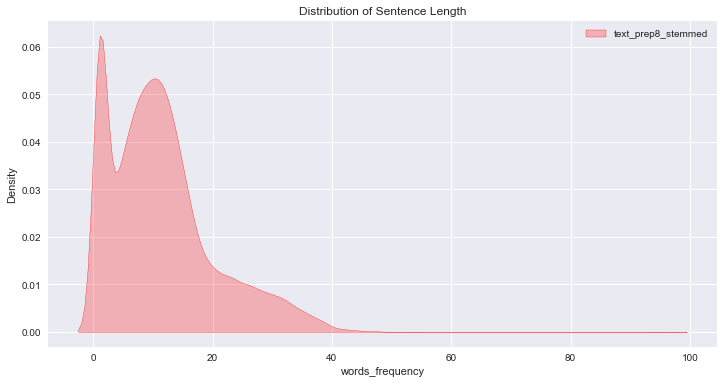

In [30]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Sentence Length')
p1=sns.kdeplot(df['words_frequency'], shade=True, color="r")
plt.legend(labels=['text_prep8_stemmed'])

plt.show()

- this is the distribution of data that has been cleaned
- the words length for each data is varied from 1 to 100 words
- we see that the most data is in the range of 1 to 15 words

## 2.B) Distribution of Sentiment

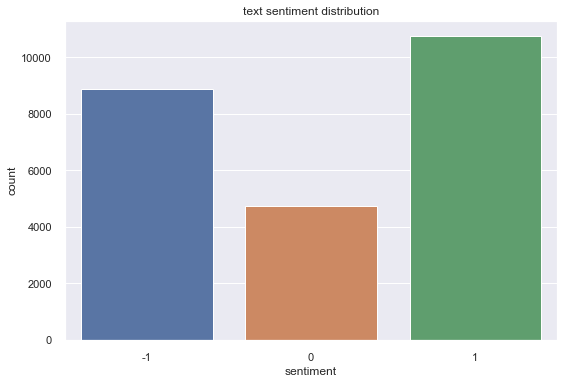

,sentiment,text_prep8_stemmed,percentage
2,1,10747,44.16
0,-1,8869,36.44
1,0,4722,19.40


total data  :  24338


In [31]:
# barchart
sns.set(style='darkgrid')

sns.countplot(x=df.sentiment)
plt.title('text sentiment distribution')

plt.tight_layout()
plt.show()

# dataframe
temp = df.groupby('sentiment').count()['text_prep8_stemmed'].reset_index().sort_values(by='text_prep8_stemmed', ascending=False)
temp['percentage'] = list(round(df.sentiment.value_counts(normalize=True) * 100, 2))
display(temp)
print('total data  : ', len(df))

- the data of `sentiment` is quite imbalanced, where `neutral sentiment` is lesser than others.
- there should be treatment in the model development

## 2.C) Distribution of Sentiment by Words Frequency

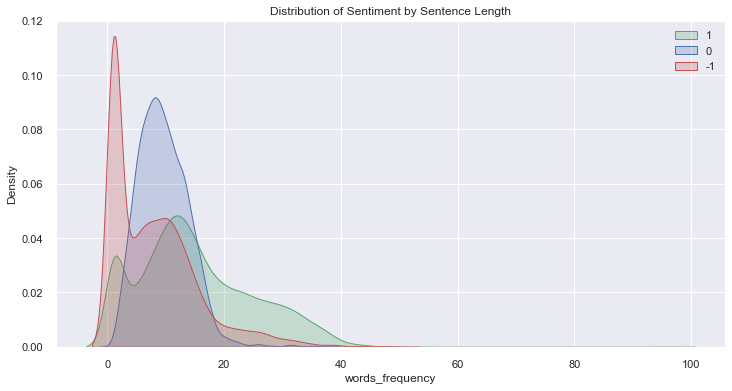

In [32]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Sentiment by Sentence Length')

p1=sns.kdeplot(df[df['sentiment']== 1]['words_frequency'], shade=True, color="g")
p1=sns.kdeplot(df[df['sentiment']== 0]['words_frequency'], shade=True, color="b")
p1=sns.kdeplot(df[df['sentiment']== -1]['words_frequency'], shade=True, color="r")


plt.legend(labels=[1, 0, -1])

plt.show()

- good sentiment data is quite distributed in the range of 1 to 40
- neutral sentiment data is normally distributed in the range of 1 to 20
- bad sentiment data is mostly distributed in the range of 1 to 5

## 2.D) Word Frequency

In [33]:
def vocab(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    vocabulary = {'word': check.index, 'freq': check.values}
    vocabulary = pd.DataFrame(vocabulary)
    vocabulary.index = vocabulary['word']
    vocabulary.drop('word', axis=1, inplace=True)
    vocabulary.sort_values('freq', ascending=False, inplace=True)
    
    return vocabulary

>##### good sentiment (1)

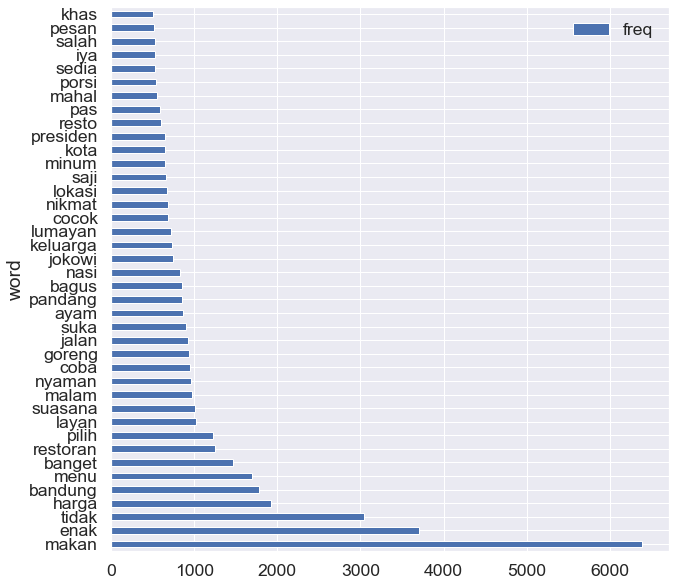

In [34]:
vocabulary_cleaned = vocab(df[df['sentiment'] == 1]['text_prep8_stemmed'])

sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[:40].plot(kind='barh', figsize=(10,10))

plt.show()

- top words for good sentiment are makan, enak harga, bandung, restoran, pilih, layan. It can be assumed that they talk about restaurant review.
- surprisingly, the word `tidak` also becomes one of top words for good sentiment. It indicates that `negation` doesnt absolutely means `negative` or `bad`. The negation can be assumed to negate something bad which in turn change the meaning into positive/neutral sentiment ('tidak jelek' or 'tidak apa-apa')

>##### bad sentiment

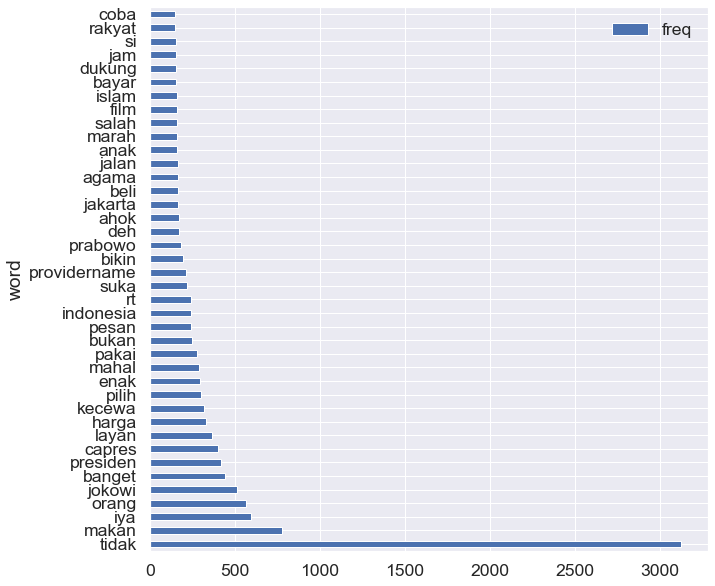

In [35]:
vocabulary_cleaned = vocab(df[df['sentiment'] == -1]['text_prep8_stemmed'])

sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[:40].plot(kind='barh', figsize=(10,10))

plt.show()

- we found that `tidak` becomes the top words in bad sentiment. However the frequency is lesser than those in good sentiment.
- the other top words are makan, iya, jokowi, orang, banget and presiden.

>##### neutral sentiment (0)

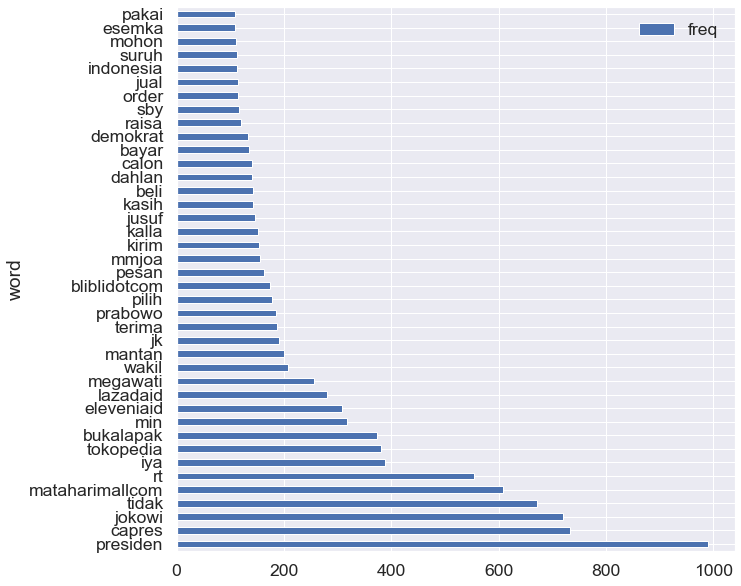

In [36]:
vocabulary_cleaned = vocab(df[df['sentiment'] == 0]['text_prep8_stemmed'])

sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[:40].plot(kind='barh', figsize=(10,10))

plt.show()

## 2.E) Word Cloud

In [37]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis('off')

>##### good sentiment

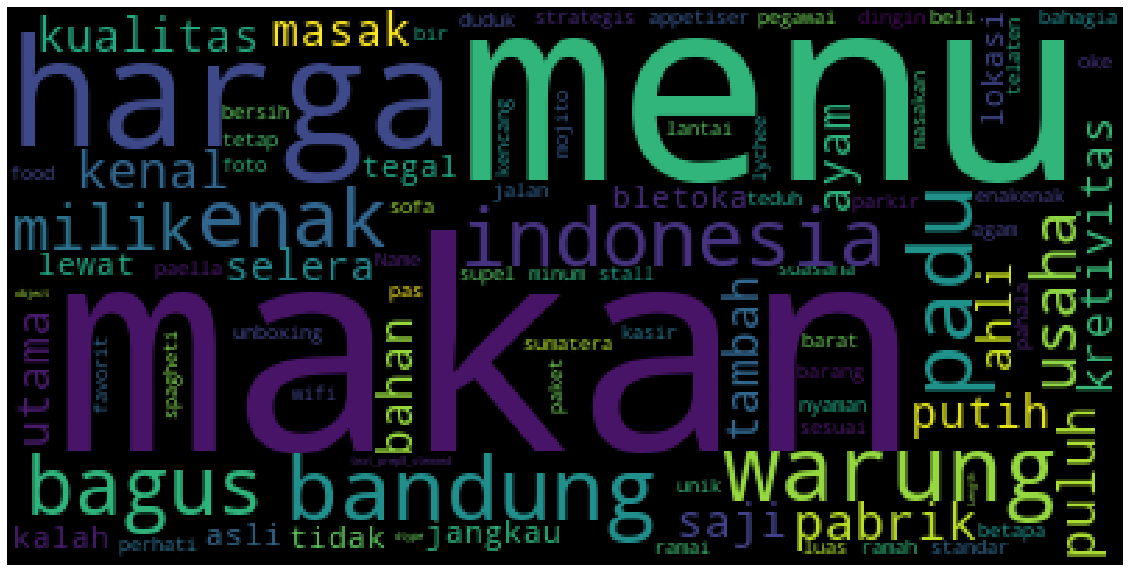

In [38]:
word_cloud = WordCloud().generate(str(df[df['sentiment'] == 1]['text_prep8_stemmed']))
plot_cloud(word_cloud)

>##### bad sentiment

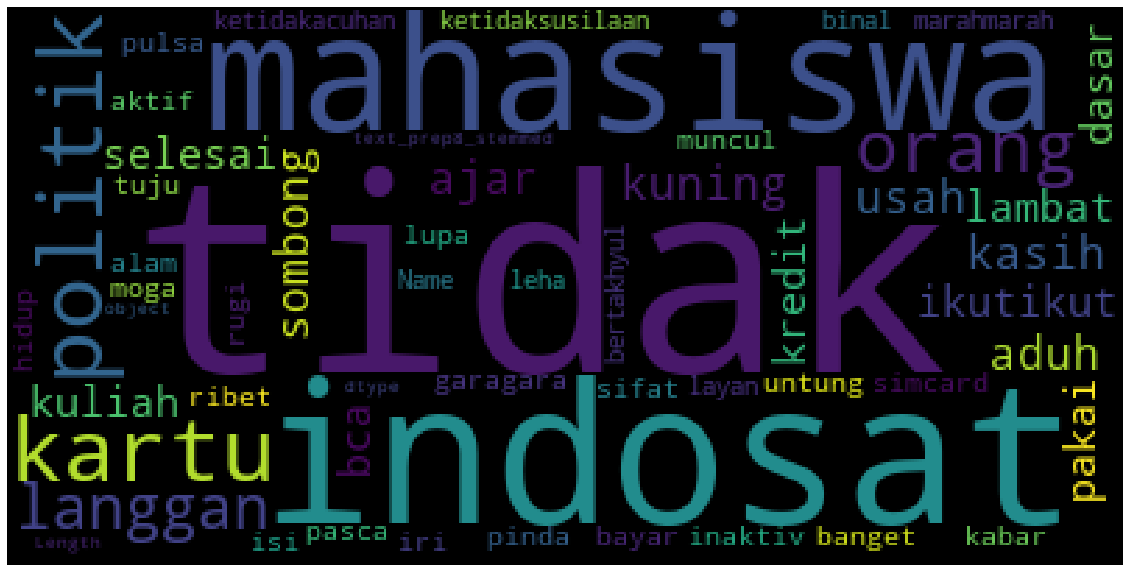

In [39]:
word_cloud = WordCloud().generate(str(df[df['sentiment'] == -1]['text_prep8_stemmed']))
plot_cloud(word_cloud)

>##### neutral sentiment

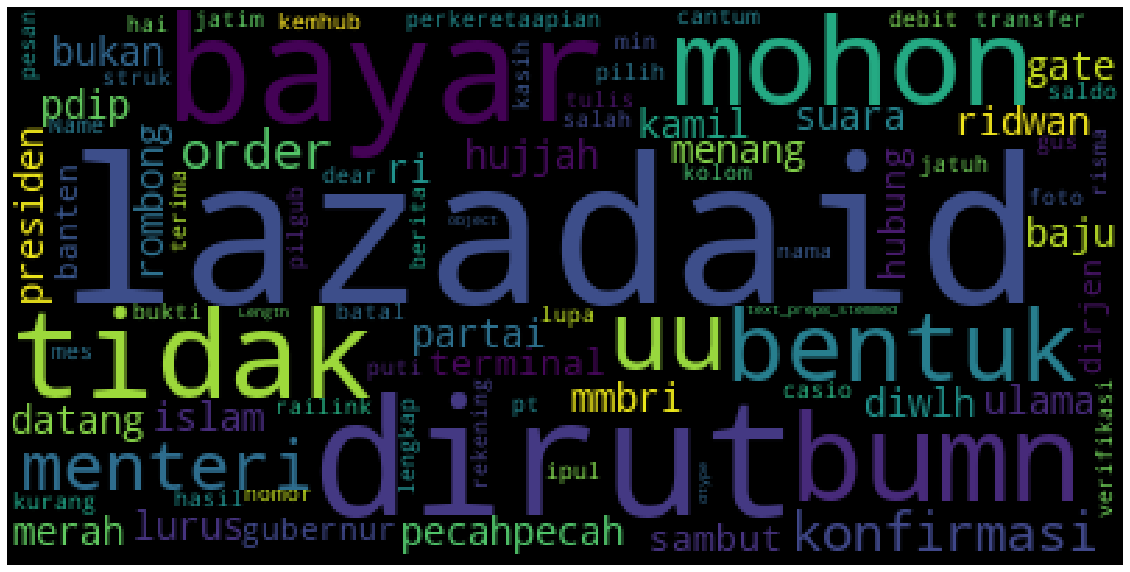

In [40]:
word_cloud = WordCloud().generate(str(df[df['sentiment'] == 0]['text_prep8_stemmed']))
plot_cloud(word_cloud)

# PART 3: TRAIN TEST SPLIT

In [41]:
text = df['text_prep8_stemmed']
y = df['sentiment']

text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=.3, stratify=y, random_state=2020)
print('total data: ', len(df))

text_train.shape, text_test.shape, y_train.shape, y_test.shape

total data:  24338


((17036,), (7302,), (17036,), (7302,))

In [42]:
print('Proportion of Target Label in train and test data')
pd.DataFrame({'y_train': y_train.value_counts(normalize=True), 'y_test': y_test.value_counts(normalize=True)})

Proportion of Target Label in train and test data


,y_train,y_test
1,0.441594,0.441523
-1,0.364405,0.364421
0,0.194001,0.194056


there is imbalance data for neutral data, this will be treated specially later in the modelling

# PART 4: TEXT PREPROCESSING - Pipeline Purpose

## 4.1) Special Characters/Words Dictionary

In [43]:
# the element on the dictionary has been curated as follows:
# - taking out the negation in stopwords, such as "tidak", "bukan", "belum", "jangan", and their variations
# - slang words sudah ditambahkan

# stopwords
STOPWORDS = ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan', 'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti', 'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai', 'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat', 'mengingatkan', 'menginginkan', 'mengira', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab', 'menjelaskan', 'menuju', 'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan', 'menyampaikan', 'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah', 'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula', 'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris', 'nyatanya', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 'pastilah', 'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan', 'pertama', 'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa', 'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai', 'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak', 'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya', 'sebisanya', 'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh', 'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'sekarang', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sekurang-kurangnya', 'sekurangnya', 'sela', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh', 'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya', 'sementara', 'semisal', 'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya', 'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti', 'sepertinya', 'sepihak', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesampai', 'sesegera', 'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu', 'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya', 'tandas', 'tandasnya', 'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat', 'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak', 'terdahulu', 'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk', 'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah', 'tertentu', 'tertuju', 'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tiga', 'tinggi', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya', 'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 'waktu', 'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'yg', 'jd', 'nya', 'sih', 'url']

# emoji converter
emoji_dictionary = {'😛': 'Face_With_Stuck-Out_Tongue', '😠': 'Angry_Face', '💣': 'Bomb', '💔': 'Broken_Heart', '😕': 'Confused_Face', '😞': 'Disappointed_Face', '😑': 'Expressionless_Face', '😋': 'Face_Savouring_Delicious_Food', '😱': 'Face_Screaming_in_Fear', '😓': 'Face_With_Cold_Sweat', '😮': 'Face_With_Open_Mouth', '😤': 'Face_With_Steam_From_Nose', '😝': 'Face_With_Stuck-Out_Tongue_&_Closed_Eyes', '😶': 'Face_Without_Mouth', '🔥': 'Fire', '☹': 'Frowning_Face', '😬': 'Grimacing_Face', '⚡': 'High_Voltage', '🤥': 'Lying_Face', '😣': 'Persevering_Face', '🙇': 'Person_Bowing', '🏃': 'Person_Running', '🐽': 'Pig_Nose', '😡': 'Pouting_Face', '🙈': 'See-No-Evil_Monkey', '🙁': 'Slightly_Frowning_Face', '🙊': 'Speak-No-Evil_Monkey', '🤔': 'Thinking_Face', '👎': 'Thumbs_Down', '👅': 'Tongue', '😩': 'Weary_Face', '🤐': 'Zipper-Mouth_Face', '😐': 'Neutral_Face', '🙄': 'Face_With_Rolling_Eyes', '😏': 'Smirking_Face', '😥': 'Disappointed_but_Relieved_Face', '😯': 'Hushed_Face', '😪': 'Sleepy_Face', '😫': 'Tired_Face', '😴': 'Sleeping_Face', '😌': 'Relieved_Face', '😜': 'Face_With_Stuck-Out_Tongue_&_Winking_EyeNegatif', '🤤': 'Drooling_Face', '😒': 'Unamused_Face', '😔': 'Pensive_Face', '🙃': 'Upside-Down_Face', '🤑': 'Money-Mouth_Face', '😲': 'Astonished_Face', '😖': 'Confounded_Face', '😟': 'Worried_Face', '😢': 'Crying_Face', '😭': 'Loudly_Crying_Face', '😦': 'Frowning_Face_With_Open_Mouth', '😧': 'Anguished_Face', '😨': 'Fearful_Face', '😰': 'Face_With_Open_Mouth_&_Cold_Sweat', '😳': 'Flushed_Face', '😵': 'Dizzy_Face', '😷': 'Face_With_Medical_Mask', '🤒': 'Face_With_Thermometer', '🤕': 'Face_With_Head-Bandage', '🤢': 'Nauseated_Face', '🤧': 'Sneezing_Face', '🤓': 'Nerd_Face', '😈': 'Smiling_Face_With_Horns', '👿': 'Angry_Face_With_Horns', '👹': 'Ogre', '👺': 'Goblin', '💀': 'Skull', '☠': 'Skull_and_Crossbones', '👻': 'Ghost', '💩': 'Pile_of_Poo', '🙀': 'Weary_Cat_Face', '😿': 'Crying_Cat_Face', '😾': 'Pouting_Cat_Face', '🙉': 'Hear-No-Evil_Monkey', '🙎': 'Person_Pouting', '🙅': 'Person_Gesturing_No', '💁': 'Person_Tipping_Hand', '🤦': 'Person_Facepalming', '🤷': 'Person_Shrugging', '🤞': 'Crossed_Fingers', '📉': 'Chart_Decreasing', '⛔': 'No_Entry', '✖': 'Heavy_Multiplication_X', '❌': 'Cross_Mark', '❎': 'Cross_Mark_Button', '👌': 'OK_Hand', '👊': 'Oncoming_Fist', '🤘': 'Sign_of_the_Horns', '😍': 'Smiling_Face_With_Heart-Eyes', '😊': 'Smiling_Face_With_Smiling_Eyes', '👍': 'Thumbs_Up', '😹': 'Cat_Face_With_Tears_of_Joy', '👏': 'Clapping_Hands', '😘': 'Face_Blowing_a_Kiss', '😂': 'face_with_tears_of_joy', '🙏': 'Folded_Hands', '✊': 'Glory', '🌟': 'Glowing_Star', '😁': 'grining_face_with_smile_eye', '😀': 'grining_face', '💘': 'Heart_With_Arrow', '✔': 'Heavy_Check_Mark', '🤗': 'Hugging_Face', '😚': 'Kissing_Face_With_Closed_Eyes', '❤': 'lovered', '🙋': 'Person_Raising_Hand', '🙌': 'Raising_Hands', '🤣': 'Rolling_on_the_Floor_Laughing', '😆': 'Smiling_Face_With_Open_Mouth_&_Closed_Eyes', '😅': 'Smiling_Face_With_Open_Mouth_&_Cold_Sweat', '😄': 'Smiling_Face_With_Open_Mouth_&_Smiling_Eyes', '😎': 'Smiling_Face_With_Sunglasses', '🏆': 'Trophy', '✌': 'Victory_Hand', '😃': 'Smiling_Face_With_Open_Mouth', '😉': 'Wingking_Face', '😗': 'Kissing_Face', '😙': 'Kissing_Face_With_Smiling_Eyes', '☺': 'Smiling_Face', '🙂': 'Slightly_Smiling_Face', '😇': 'Smiling_Face_With_Halo', '🤠': 'Cowboy_Hat_Face', '🤡': 'Clown_Face', '😺': 'Smiling_Cat_Face_With_Open_Mouth', '😸': 'Grinning_Cat_Face_With_Smiling_Eyes', '😻': 'Smiling_Cat_Face_With_Heart-Eyes', '😼': 'Cat_Face_With_Wry_Smile', '😽': 'Kissing_Cat_Face_With_Closed_Eyes', '✈': 'Plane', '👼': 'Baby_Angel', '💆': 'Person_Getting_Massage', '🚶': 'Person_Walking', '💃': 'Woman_Dancing', '👭': 'Two_Women_Holding_Hands', '💏': 'Kiss', '💑': 'Couple_With_Heart', '💪': 'Flexed_Biceps', '🖐': 'Raised_Hand_With_Fingers_Splayed', '🤝': 'Handshake', '💋': 'Kiss_Mark', '💞': 'Revolving_Hearts', '💝': 'Heart_With_Ribbon', '💎': 'Gem_Stone', '🐥': 'Front-Facing_Baby_Chick', '💐': 'Bouquet', '🌹': 'Rose', '🌛': 'First_Quarter_Moon_With_Face', '🌜': 'Last_Quarter_Moon_With_Face', '🌝': 'Full_Moon_With_Face', '🌞': 'Sun_With_Face', '⭐': 'White_Medium_Star', '🌈': 'Rainbow', '🎀': 'Ribbon', '🎁': 'Wrapped_Gift', '💡': 'Light_Bulb', '📈': 'Chart_Increasing', '💯': 'Hundred_Points', '🆗': 'OK_Button'}

# slang words converter
slang_data = {'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 'banget', 'bg': 'abang', 'bgmn': 'bagaimana', 'bgt': 'banget', 'bijimane': 'bagaimana', 'bintal': 'bimbingan mental', 'bkl': 'akan', 'bkn': 'bukan','bknnya': 'bukannya', 'blegug': 'bodoh', 'blh': 'boleh', 'bln': 'bulan', 'blm': 'belum','blum': 'belum', 'bnci': 'benci', 'bnran': 'yang benar', 'bodor': 'lucu', 'bokap': 'ayah', 'boker': 'buang air besar', 'bokis': 'bohong', 'boljug': 'boleh juga', 'bonek': 'bocah nekat', 'boyeh': 'boleh', 'br': 'baru', 'brg': 'bareng', 'bro': 'saudara laki-laki', 'bru': 'baru', 'bs': 'bisa', 'bsen': 'bosan', 'bt': 'buat', 'btw': 'ngomong-ngomong', 'buaya': 'tidak setia', 'bubbu': 'tidur', 'bubu': 'tidur', 'bumil': 'ibu hamil', 'bw': 'bawa', 'bwt': 'buat', 'byk': 'banyak', 'byrin': 'bayarkan', 'cabal': 'sabar', 'cadas': 'keren', 'calo': 'makelar', 'can': 'belum', 'capcus': 'pergi', 'caper': 'cari perhatian', 'ce': 'cewek', 'cekal': 'cegah tangkal', 'cemen': 'penakut', 'cengengesan': 'tertawa', 'cepet': 'cepat', 'cew': 'cewek', 'chuyunk': 'sayang', 'cimeng': 'ganja', 'cipika cipiki': 'cium pipi kanan cium pipi kiri', 'ciyh': 'sih', 'ckepp': 'cakep', 'ckp': 'cakep', 'cm': 'cuma', 'cuman': 'cuma', 'cmiiw': "correct me if i'm wrong", 'cmpur': 'campur', 'cong': 'banci', 'conlok': 'cinta lokasi', 'cowwyy': 'maaf', 'cp': 'siapa', 'cpe': 'capek', 'cppe': 'capek', 'cucok': 'cocok', 'cuex': 'cuek', 'cumi': 'Cuma miscall', 'cups': 'culun', 'curanmor': 'pencurian kendaraan bermotor', 'curcol': 'curahan hati colongan', 'cwek': 'cewek', 'cyin': 'cinta', 'd': 'di', 'dah': 'deh', 'dapet': 'dapat', 'de': 'adik', 'dek': 'adik', 'demen': 'suka', 'deyh': 'deh', 'dgn': 'dengan', 'diancurin': 'dihancurkan', 'dimaafin': 'dimaafkan', 'dimintak': 'diminta', 'disono': 'di sana', 'dkt': 'dekat', 'dket': 'dekat', 'dkk': 'dan kawan-kawan', 'dll': 'dan lain-lain', 'dlu': 'dulu', 'dngn': 'dengan', 'dodol': 'bodoh', 'doku': 'uang', 'dongs': 'dong', 'dpt': 'dapat', 'dri': 'dari', 'drmn': 'darimana', 'drtd': 'dari tadi', 'dst': 'dan seterusnya', 'dtg': 'datang', 'duh': 'aduh', 'duren': 'durian', 'ed': 'edisi', 'egp': 'emang gue pikirin', 'eke': 'aku', 'elu': 'kamu', 'emangnya': 'memangnya', 'emng': 'memang', 'endak': 'tidak', 'enggak': 'tidak', 'envy': 'iri', 'ex': 'mantan', 'fax': 'facsimile', 'fifo': 'first in first out', 'folbek': 'follow back', 'fyi': 'sebagai informasi', 'ga':'tidak', 'gaada': 'tidak ada uang', 'gag': 'tidak', 'gaje': 'tidak jelas', 'gak': 'tidak', 'gak papa': 'tidak apa-apa', 'gan': 'juragan', 'gaptek': 'gagap teknologi', 'gatek': 'gagap teknologi', 'gawe': 'kerja', 'gbs': 'tidak bisa', 'gebetan': 'orang yang disuka', 'gaje': 'tidak jelas', 'geje': 'tidak jelas', 'gepeng': 'gelandangan dan pengemis', 'ghiy': 'lagi', 'gile': 'gila', 'gimana': 'bagaimana', 'gino': 'gigi nongol', 'githu': 'gitu', 'gj': 'tidak jelas', 'gmana': 'bagaimana', 'gmn': 'bagaimana', 'gn': 'begini', 'goblok': 'bodoh', 'golput': 'golongan putih', 'gowes': 'mengayuh sepeda', 'gpp': 'tidak apa-apa', 'gpny': 'tidak punya', 'gr': 'gede rasa', 'gretongan': 'gratisan', 'gtau': 'tidak tahu', 'gt': 'begitu', 'gua': 'saya', 'guoblok': 'goblok', 'gw': 'saya', 'ha': 'tertawa', 'haha': 'tertawa', 'hallow': 'halo', 'hankam': 'pertahanan dan keamanan', 'hehe': 'he', 'helo': 'halo', 'hey': 'hai', 'hlm': 'halaman', 'hny': 'hanya', 'hoax': 'isu bohong', 'hr': 'hari', 'hrus': 'harus', 'hubdar': 'perhubungan darat', 'huff': 'mengeluh', 'hum': 'rumah', 'humz': 'rumah', 'ilang': 'hilang', 'ilfil': 'tidak suka', 'imho': 'in my humble opinion', 'imoetz': 'imut', 'item': 'hitam', 'itungan': 'hitungan', 'iye': 'iya', 'ja': 'saja', 'jadiin': 'jadi', 'jaim': 'jaga image', 'jayus': 'tidak lucu', 'jdi': 'jadi', 'jem': 'jam', 'jga': 'juga', 'jgnkan': 'jangankan', 'jir': 'anjing', 'jln': 'jalan', 'jomblo': 'tidak punya pacar', 'jubir': 'juru bicara', 'jutek': 'galak', 'k': 'ke', 'kab': 'kabupaten', 'kabor': 'kabur', 'kacrut': 'kacau', 'kadiv': 'kepala divisi', 'kagak': 'tidak', 'kalo': 'kalau', 'kampret': 'sialan', 'kamtibmas': 'keamanan dan ketertiban masyarakat', 'kamuwh': 'kamu', 'kanwil': 'kantor wilayah', 'karna': 'karena', 'kasubbag': 'kepala subbagian', 'katrok': 'kampungan', 'kayanya': 'kayaknya', 'kbr': 'kabar', 'kdu': 'harus', 'kec': 'kecamatan', 'kejurnas': 'kejuaraan nasional', 'kekeuh': 'keras kepala', 'kel': 'kelurahan', 'kemaren': 'kemarin', 'kepengen': 'mau', 'kepingin': 'mau', 'kepsek': 'kepala sekolah', 'kesbang': 'kesatuan bangsa', 'kesra': 'kesejahteraan rakyat', 'ketrima': 'diterima', 'kgiatan': 'kegiatan', 'kibul': 'bohong', 'kimpoi': 'kawin', 'kl': 'kalau', 'klianz': 'kalian', 'kloter': 'kelompok terbang', 'klw': 'kalau', 'km': 'kamu', 'kmps': 'kampus', 'kmrn': 'kemarin', 'knal': 'kenal', 'knp': 'kenapa', 'kodya': 'kota madya', 'komdis': 'komisi disiplin', 'komsov': 'komunis sovyet', 'kongkow': 'kumpul bareng teman-teman', 'kopdar': 'kopi darat', 'korup': 'korupsi', 'kpn': 'kapan', 'krenz': 'keren', 'krm': 'kirim', 'kt': 'kita', 'ktmu': 'ketemu', 'ktr': 'kantor', 'kuper': 'kurang pergaulan', 'kw': 'imitasi', 'kyk': 'seperti', 'la': 'lah', 'lam': 'salam', 'lamp': 'lampiran', 'lanud': 'landasan udara', 'latgab': 'latihan gabungan', 'lebay': 'berlebihan', 'leh': 'boleh', 'lelet': 'lambat', 'lemot': 'lambat', 'lgi': 'lagi', 'lgsg': 'langsung', 'liat': 'lihat', 'litbang': 'penelitian dan pengembangan', 'lmyn': 'lumayan', 'lo': 'kamu', 'loe': 'kamu', 'lola': 'lambat berfikir', 'louph': 'cinta', 'low': 'kalau', 'lp': 'lupa', 'luber': 'langsung, umum, bebas, dan rahasia', 'luchuw': 'lucu', 'lum': 'belum', 'luthu': 'lucu', 'lwn': 'lawan', 'maacih': 'terima kasih', 'mabal': 'bolos', 'macem': 'macam', 'macih': 'masih', 'maem': 'makan', 'magabut': 'makan gaji buta', 'maho': 'homo', 'mak jang': 'kaget', 'maksain': 'memaksa', 'malem': 'malam', 'mam': 'makan', 'maneh': 'kamu', 'maniez': 'manis', 'mao': 'mau', 'masukin': 'masukkan', 'melu': 'ikut', 'mepet': 'dekat sekali', 'mgu': 'minggu', 'migas': 'minyak dan gas bumi', 'mikol': 'minuman beralkohol', 'miras': 'minuman keras', 'mlah': 'malah', 'mngkn': 'mungkin', 'mo': 'mau', 'mokad': 'mati', 'moso': 'masa', 'mpe': 'sampai', 'msk': 'masuk', 'mslh': 'masalah', 'mt': 'makan teman', 'mubes': 'musyawarah besar', 'mulu': 'melulu', 'mumpung': 'selagi', 'munas': 'musyawarah nasional', 'muntaber': 'muntah dan berak', 'musti': 'mesti', 'muupz': 'maaf', 'mw': 'now watching', 'n': 'dan', 'nanam': 'menanam', 'nanya': 'bertanya', 'napa': 'kenapa', 'napi': 'narapidana', 'napza': 'narkotika, alkohol, psikotropika, dan zat adiktif ', 'narkoba': 'narkotika, psikotropika, dan obat terlarang', 'nasgor': 'nasi goreng', 'nda': 'tidak', 'ndiri': 'sendiri', 'ne': 'ini', 'nekolin': 'neokolonialisme', 'nembak': 'menyatakan cinta', 'ngabuburit': 'menunggu berbuka puasa', 'ngaku': 'mengaku', 'ngambil': 'mengambil', 'nganggur': 'tidak punya pekerjaan', 'ngapah': 'kenapa', 'ngaret': 'terlambat', 'ngasih': 'memberikan', 'ngebandel': 'berbuat bandel', 'ngegosip': 'bergosip', 'ngeklaim': 'mengklaim', 'ngeksis': 'menjadi eksis', 'ngeles': 'berkilah', 'ngelidur': 'menggigau', 'ngerampok': 'merampok', 'ngga': 'tidak', 'ngibul': 'berbohong', 'ngiler': 'mau', 'ngiri': 'iri', 'ngisiin': 'mengisikan', 'ngmng': 'bicara', 'ngomong': 'bicara', 'ngubek2': 'mencari-cari', 'ngurus': 'mengurus', 'nie': 'ini', 'nih': 'ini', 'niyh': 'nih', 'nmr': 'nomor', 'nntn': 'nonton', 'nobar': 'nonton bareng', 'np': 'now playing', 'ntar': 'nanti', 'ntn': 'nonton', 'numpuk': 'bertumpuk', 'nutupin': 'menutupi', 'nyari': 'mencari', 'nyekar': 'menyekar', 'nyicil': 'mencicil', 'nyoblos': 'mencoblos', 'nyokap': 'ibu', 'ogah': 'tidak mau', 'ol': 'online', 'ongkir': 'ongkos kirim', 'oot': 'out of topic', 'org2': 'orang-orang', 'ortu': 'orang tua', 'otda': 'otonomi daerah', 'otw': 'on the way, sedang di jalan', 'pacal': 'pacar', 'pake': 'pakai', 'pala': 'kepala', 'pansus': 'panitia khusus', 'parpol': 'partai politik', 'pasutri': 'pasangan suami istri', 'pd': 'pada', 'pede': 'percaya diri', 'pelatnas': 'pemusatan latihan nasional', 'pemda': 'pemerintah daerah', 'pemkot': 'pemerintah kota', 'pemred': 'pemimpin redaksi', 'penjas': 'pendidikan jasmani', 'perda': 'peraturan daerah', 'perhatiin': 'perhatikan', 'pesenan': 'pesanan', 'pgang': 'pegang', 'pi': 'tapi', 'pilkada': 'pemilihan kepala daerah', 'pisan': 'sangat', 'pk': 'penjahat kelamin', 'plg': 'paling', 'pmrnth': 'pemerintah', 'polantas': 'polisi lalu lintas', 'ponpes': 'pondok pesantren', 'pp': 'pulang pergi', 'prg': 'pergi', 'prnh': 'pernah', 'psen': 'pesan', 'pst': 'pasti', 'pswt': 'pesawat', 'pw': 'posisi nyaman', 'qmu': 'kamu', 'rakor': 'rapat koordinasi', 'ranmor': 'kendaraan bermotor', 're': 'reply', 'ref': 'referensi', 'rehab': 'rehabilitasi', 'rempong': 'sulit', 'repp': 'balas', 'restik': 'reserse narkotika', 'rhs': 'rahasia', 'rmh': 'rumah', 'ru': 'baru', 'ruko': 'rumah toko', 'rusunawa': 'rumah susun sewa', 'ruz': 'terus', 'saia': 'saya', 'salting': 'salah tingkah', 'sampe': 'sampai', 'samsek': 'sama sekali', 'sapose': 'siapa', 'satpam': 'satuan pengamanan', 'sbb': 'sebagai berikut', 'sbg': 'sebagai', 'sbh': 'sebuah', 'sbnrny': 'sebenarnya', 'scr': 'secara', 'sdgkn': 'sedangkan', 'sdkt': 'sedikit', 'se7': 'setuju', 'sebelas dua belas': 'mirip', 'sembako': 'sembilan bahan pokok', 'sempet': 'sempat', 'sendratari': 'seni drama tari', 'sgt': 'sangat', 'shg': 'sehingga', 'siech': 'sih', 'sikon': 'situasi dan kondisi', 'sinetron': 'sinema elektronik', 'siramin': 'siramkan', 'sj': 'saja', 'skalian': 'sekalian', 'sklh': 'sekolah', 'skt': 'sakit', 'slesai': 'selesai', 'sll': 'selalu', 'slma': 'selama', 'slsai': 'selesai', 'smpt': 'sempat', 'smw': 'semua', 'sndiri': 'sendiri', 'soljum': 'sholat jumat', 'songong': 'sombong', 'sory': 'maaf', 'sosek': 'sosial-ekonomi', 'sotoy': 'sok tahu', 'spa': 'siapa', 'sppa': 'siapa', 'spt': 'seperti', 'srtfkt': 'sertifikat', 'stiap': 'setiap', 'stlh': 'setelah', 'suk': 'masuk', 'sumpek': 'sempit', 'syg': 'sayang', 't4': 'tempat', 'tajir': 'kaya', 'tau': 'tahu', 'taw': 'tahu', 'td': 'tadi', 'tdk': 'tidak', 'teh': 'kakak perempuan', 'telat': 'terlambat', 'telmi': 'telat berpikir', 'temen': 'teman', 'tengil': 'menyebalkan', 'tepar': 'terkapar', 'tggu': 'tunggu', 'tgu': 'tunggu', 'thankz': 'terima kasih', 'thn': 'tahun', 'tilang': 'bukti pelanggaran', 'tipiwan': 'TvOne', 'tks': 'terima kasih', 'tlp': 'telepon', 'tls': 'tulis', 'tmbah': 'tambah', 'tmen2': 'teman-teman', 'tmpah': 'tumpah', 'tmpt': 'tempat', 'tngu': 'tunggu', 'tnyta': 'ternyata', 'tokai': 'tai', 'toserba': 'toko serba ada', 'tpi': 'tapi', 'trdhulu': 'terdahulu', 'trima': 'terima kasih', 'trm': 'terima', 'trs': 'terus', 'trutama': 'terutama', 'ts': 'penulis', 'tst': 'tahu sama tahu', 'ttg': 'tentang', 'tuch': 'tuh', 'tuir': 'tua', 'tw': 'tahu', 'u': 'kamu', 'ud': 'sudah', 'udah': 'sudah', 'ujg': 'ujung', 'ul': 'ulangan', 'unyu': 'lucu', 'uplot': 'unggah', 'urang': 'saya', 'usah': 'perlu', 'utk': 'untuk', 'valas': 'valuta asing', 'w/': 'dengan', 'wadir': 'wakil direktur', 'wamil': 'wajib militer', 'warkop': 'warung kopi', 'warteg': 'warung tegal', 'wat': 'buat', 'wkt': 'waktu', 'wtf': 'what the fuck', 'xixixi': 'tertawa', 'ya': 'iya', 'yap': 'iya', 'yaudah': 'ya sudah', 'yawdah': 'ya sudah', 'yg': 'yang', 'yl': 'yang lain', 'yo': 'iya', 'yowes': 'ya sudah', 'yup': 'iya', '7an': 'tujuan', 'ababil': 'abg labil', 'acc': 'accord', 'adlah': 'adalah', 'adoh': 'aduh', 'aha': 'tertawa', 'aing': 'saya', 'aja': 'saja', 'ajj': 'saja', 'aka': 'dikenal juga sebagai', 'akko': 'aku', 'akku': 'aku', 'akyu': 'aku', 'aljasa': 'asal jadi saja', 'ama': 'sama', 'ambl': 'ambil', 'anjir': 'anjing', 'ank': 'anak', 'ap': 'apa', 'apaan': 'apa', 'ape': 'apa', 'aplot': 'unggah', 'apva': 'apa', 'aqu': 'aku', 'asap': 'sesegera mungkin', 'aseek': 'asyik', 'asek': 'asyik', 'aseknya': 'asyiknya', 'asoy': 'asyik', 'astrojim': 'astagfirullahaladzim', 'ath': 'kalau begitu', 'atuh': 'kalau begitu', 'ava': 'avatar', 'aws': 'awas', 'ayang': 'sayang', 'ayok': 'ayo', 'bacot': 'banyak bicara', 'bales': 'balas', 'bangdes': 'pembangunan desa', 'bangkotan': 'tua', 'banpres': 'bantuan presiden', 'bansarkas': 'bantuan sarana kesehatan', 'bazis': 'badan amal, zakat, infak, dan sedekah', 'bcoz': 'karena', 'beb': 'sayang', 'bejibun': 'banyak', 'belom': 'belum', 'bener': 'benar', 'ber2': 'berdua', 'berdikari': 'berdiri di atas kaki sendiri', 'bet': 'banget', 'beti': 'beda tipis', 'beut': 'banget', 'bgd': 'banget', 'bgs': 'bagus', 'bhubu': 'tidur', 'bimbuluh': 'bimbingan dan penyuluhan', 'bisi': 'kalau-kalau', 'bkn': 'bukan', 'bl': 'beli', 'blg': 'bilang', 'blm': 'belum', 'bls': 'balas', 'bnchi': 'benci', 'bngung': 'bingung', 'bnyk': 'banyak', 'bohay': 'badan aduhai', 'bokep': 'porno', 'bokin': 'pacar', 'bole': 'boleh', 'bolot': 'bodoh', 'bonyok': 'ayah ibu', 'bpk': 'bapak', 'brb': 'segera kembali', 'brngkt': 'berangkat', 'brp': 'berapa', 'brur': 'saudara laki-laki', 'bsa': 'bisa', 'bsk': 'besok', 'bu_bu': 'tidur', 'bubarin': 'bubarkan', 'buber': 'buka bersama', 'bujubune': 'luar biasa', 'buser': 'buru sergap', 'bwhn': 'bawahan', 'byar': 'bayar', 'byr': 'bayar', 'c8': 'chat', 'cabut': 'pergi', 'caem': 'cakep', 'cama-cama': 'sama-sama', 'cangcut': 'celana dalam', 'cape': 'capek', 'caur': 'jelek', 'cekak': 'tidak ada uang', 'cekidot': 'coba lihat', 'cemplungin': 'cemplungkan', 'ceper': 'pendek', 'ceu': 'kakak perempuan', 'cewe': 'cewek', 'cibuk': 'sibuk', 'cin': 'cinta', 'ciye': 'cie', 'ckck': 'ck', 'clbk': 'cinta lama bersemi kembali', 'cmpr': 'campur', 'cnenk': 'senang', 'congor': 'mulut', 'cow': 'cowok', 'coz': 'karena', 'cpa': 'siapa', 'gokil': 'gila', 'gombal': 'suka merayu', 'gpl': 'tidak pakai lama', 'gpp': 'tidak apa-apa', 'gretong': 'gratis', 'gt': 'begitu', 'gtw': 'tidak tahu', 'gue': 'saya', 'guys': 'teman-teman', 'gws': 'cepat sembuh', 'haghaghag': 'tertawa', 'hakhak': 'tertawa', 'handak': 'bahan peledak', 'hansip': 'pertahanan sipil', 'hellow': 'halo', 'helow': 'halo', 'hi': 'hai', 'hlng': 'hilang', 'hnya': 'hanya', 'houm': 'rumah', 'hrs': 'harus', 'hubad': 'hubungan angkatan darat', 'hubla': 'perhubungan laut', 'huft': 'mengeluh', 'humas': 'hubungan masyarakat', 'idk': 'saya tidak tahu', 'ilfeel': 'tidak suka', 'imba': 'jago sekali', 'imoet': 'imut', 'info': 'informasi', 'itung': 'hitung', 'isengin': 'bercanda', 'iyala': 'iya lah', 'iyo': 'iya', 'jablay': 'jarang dibelai', 'jadul': 'jaman dulu', 'jancuk': 'anjing', 'jd': 'jadi', 'jdikan': 'jadikan', 'jg': 'juga', 'jgn': 'jangan', 'jijay': 'jijik', 'jkt': 'jakarta', 'jnj': 'janji', 'jth': 'jatuh', 'jurdil': 'jujur adil', 'jwb': 'jawab', 'ka': 'kakak', 'kabag': 'kepala bagian', 'kacian': 'kasihan', 'kadit': 'kepala direktorat', 'kaga': 'tidak', 'kaka': 'kakak', 'kamtib': 'keamanan dan ketertiban', 'kamuh': 'kamu', 'kamyu': 'kamu', 'kapt': 'kapten', 'kasat': 'kepala satuan', 'kasubbid': 'kepala subbidang', 'kau': 'kamu', 'kbar': 'kabar', 'kcian': 'kasihan', 'keburu': 'terlanjur', 'kedubes': 'kedutaan besar', 'kek': 'seperti', 'keknya': 'kayaknya', 'keliatan': 'kelihatan', 'keneh': 'masih', 'kepikiran': 'terpikirkan', 'kepo': 'mau tahu urusan orang', 'kere': 'tidak punya uang', 'kesian': 'kasihan', 'ketauan': 'ketahuan', 'keukeuh': 'keras kepala', 'khan': 'kan', 'kibus': 'kaki busuk', 'kk': 'kakak', 'klian': 'kalian', 'klo': 'kalau', 'kluarga': 'keluarga', 'klwrga': 'keluarga', 'kmari': 'kemari', 'kmpus': 'kampus', 'kn': 'kan', 'knl': 'kenal', 'knpa': 'kenapa', 'kog': 'kok', 'kompi': 'komputer', 'komtiong': 'komunis Tiongkok', 'konjen': 'konsulat jenderal', 'koq': 'kok', 'kpd': 'kepada', 'kptsan': 'keputusan', 'krik': 'garing', 'krn': 'karena', 'ktauan': 'ketahuan', 'ktny': 'katanya', 'kudu': 'harus', 'kuq': 'kok', 'ky': 'seperti', 'kykny': 'kayanya', 'laka': 'kecelakaan', 'lambreta': 'lambat', 'lansia': 'lanjut usia', 'lapas': 'lembaga pemasyarakatan', 'lbur': 'libur', 'lekong': 'laki-laki', 'lg': 'lagi', 'lgkp': 'lengkap', 'lht': 'lihat', 'linmas': 'perlindungan masyarakat', 'lmyan': 'lumayan', 'lngkp': 'lengkap', 'loch': 'loh', 'lol': 'tertawa', 'lom': 'belum', 'loupz': 'cinta', 'lowh': 'kamu', 'lu': 'kamu', 'luchu': 'lucu', 'luff': 'cinta', 'luph': 'cinta', 'lw': 'kamu', 'lwt': 'lewat', 'maaciw': 'terima kasih', 'mabes': 'markas besar', 'macem-macem': 'macam-macam', 'madesu': 'masa depan suram', 'maen': 'main', 'mahatma': 'maju sehat bersama', 'mak': 'ibu', 'makasih': 'terima kasih', 'malah': 'bahkan', 'malu2in': 'memalukan', 'mamz': 'makan', 'manies': 'manis', 'mantep': 'mantap', 'markus': 'makelar kasus', 'mba': 'mbak', 'mending': 'lebih baik', 'mgkn': 'mungkin', 'mhn': 'mohon', 'miker': 'minuman keras', 'milis': 'mailing list', 'mksd': 'maksud', 'mls': 'malas', 'mnt': 'minta', 'moge': 'motor gede', 'mokat': 'mati', 'mosok': 'masa', 'msh': 'masih', 'mskpn': 'meskipun', 'msng2': 'masing-masing', 'muahal': 'mahal', 'muker': 'musyawarah kerja', 'mumet': 'pusing', 'muna': 'munafik', 'munaslub': 'musyawarah nasional luar biasa', 'musda': 'musyawarah daerah', 'muup': 'maaf', 'muuv': 'maaf', 'nal': 'kenal', 'nangis': 'menangis', 'naon': 'apa', 'napol': 'narapidana politik', 'naq': 'anak', 'narsis': 'bangga pada diri sendiri', 'nax': 'anak', 'ndak': 'tidak', 'ndut': 'gendut', 'nekolim': 'neokolonialisme', 'nelfon': 'menelepon', 'ngabis2in': 'menghabiskan', 'ngakak': 'tertawa', 'ngambek': 'marah', 'ngampus': 'pergi ke kampus', 'ngantri': 'mengantri', 'ngapain': 'sedang apa', 'ngaruh': 'berpengaruh', 'ngawur': 'berbicara sembarangan', 'ngeceng': 'kumpul bareng-bareng', 'ngeh': 'sadar', 'ngekos': 'tinggal di kos', 'ngelamar': 'melamar', 'ngeliat': 'melihat', 'ngemeng': 'bicara terus-terusan', 'ngerti': 'mengerti', 'nggak': 'tidak', 'ngikut': 'ikut', 'nginep': 'menginap', 'ngisi': 'mengisi', 'ngmg': 'bicara', 'ngocol': 'lucu', 'ngomongin': 'membicarakan', 'ngumpul': 'berkumpul', 'ni': 'ini', 'nyasar': 'tersesat', 'nyariin': 'mencari', 'nyiapin': 'mempersiapkan', 'nyiram': 'menyiram', 'nyok': 'ayo', 'o/': 'oleh', 'ok': 'ok', 'priksa': 'periksa', 'pro': 'profesional', 'psn': 'pesan', 'psti': 'pasti', 'puanas': 'panas', 'qmo': 'kamu', 'qt': 'kita', 'rame': 'ramai', 'raskin': 'rakyat miskin', 'red': 'redaksi', 'reg': 'register', 'rejeki': 'rezeki', 'renstra': 'rencana strategis', 'reskrim': 'reserse kriminal', 'sni': 'sini', 'somse': 'sombong sekali', 'sorry': 'maaf', 'sosbud': 'sosial-budaya', 'sospol': 'sosial-politik', 'sowry': 'maaf', 'spd': 'sepeda', 'sprti': 'seperti', 'spy': 'supaya', 'stelah': 'setelah', 'subbag': 'subbagian', 'sumbangin': 'sumbangkan', 'sy': 'saya', 'syp': 'siapa', 'tabanas': 'tabungan pembangunan nasional', 'tar': 'nanti', 'taun': 'tahun', 'tawh': 'tahu', 'tdi': 'tadi', 'te2p': 'tetap', 'tekor': 'rugi', 'telkom': 'telekomunikasi', 'telp': 'telepon', 'temen2': 'teman-teman', 'tengok': 'menjenguk', 'terbitin': 'terbitkan', 'tgl': 'tanggal', 'thanks': 'terima kasih', 'thd': 'terhadap', 'thx': 'terima kasih', 'tipi': 'TV', 'tkg': 'tukang', 'tll': 'terlalu', 'tlpn': 'telepon', 'tman': 'teman', 'tmbh': 'tambah', 'tmn2': 'teman-teman', 'tmph': 'tumpah', 'tnda': 'tanda', 'tnh': 'tanah', 'togel': 'toto gelap', 'tp': 'tapi', 'tq': 'terima kasih', 'trgntg': 'tergantung', 'trims': 'terima kasih', 'cb': 'coba', 'y': 'ya', 'munfik': 'munafik', 'reklamuk': 'reklamasi', 'sma': 'sama', 'tren': 'trend', 'ngehe': 'kesal', 'mz': 'mas', 'analisise': 'analisis', 'sadaar': 'sadar', 'sept': 'september', 'nmenarik': 'menarik', 'zonk': 'bodoh', 'rights': 'benar', 'simiskin': 'miskin', 'ngumpet': 'sembunyi', 'hardcore': 'keras', 'akhirx': 'akhirnya', 'solve': 'solusi', 'watuk': 'batuk', 'ngebully': 'intimidasi', 'masy': 'masyarakat', 'still': 'masih', 'tauk': 'tahu', 'mbual': 'bual', 'tioghoa': 'tionghoa', 'ngentotin': 'senggama', 'kentot': 'senggama', 'faktakta': 'fakta', 'sohib': 'teman', 'rubahnn': 'rubah', 'trlalu': 'terlalu', 'nyela': 'cela', 'heters': 'pembenci', 'nyembah': 'sembah', 'most': 'paling', 'ikon': 'lambang', 'light': 'terang', 'pndukung': 'pendukung', 'setting': 'atur', 'seting': 'akting', 'next': 'lanjut', 'waspadalah': 'waspada', 'gantengsaya': 'ganteng', 'parte': 'partai', 'nyerang': 'serang', 'nipu': 'tipu', 'ktipu': 'tipu', 'jentelmen': 'berani', 'buangbuang': 'buang', 'tsangka': 'tersangka', 'kurng': 'kurang', 'ista': 'nista', 'less': 'kurang', 'koar': 'teriak', 'paranoid': 'takut', 'problem': 'masalah', 'tahi': 'kotoran', 'tirani': 'tiran', 'tilep': 'tilap', 'happy': 'bahagia', 'tak': 'tidak', 'penertiban': 'tertib', 'uasai': 'kuasa', 'mnolak': 'tolak', 'trending': 'trend', 'taik': 'tahi', 'wkwkkw': 'tertawa', 'ahokncc': 'ahok', 'istaa': 'nista', 'benarjujur': 'jujur', 'mgkin': 'mungkin'}

## 4.2) Text Preprocessing Functions
- Step 1
    1. converting to lower case
    1. remove or convert number into text
    1. remove punctuation
    1. remove white spaces
    1. converting slang words to standard words
    1. converting emoji to emoji description
    1. remove stopwords and particular words 
- Step 2
    8. stemming (Indonesian affixation system)

In [44]:
# 1) Converting to Lower Case
def to_lower(text):
    return text.lower()

# 2) remove or convert number into text
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

# 3) remove punctuation
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

# 4) remove white spaces
def remove_white_space(text):
    return " ".join(text.split())

# 5) converting slang words to standard words
def slang_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(slang_data.keys()):
            text_split[text_split.index(i)] = slang_data[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 6) converting emoji to description
def emoji_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(emoji_dictionary.keys()):
            text_split[text_split.index(i)] = emoji_dictionary[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 7) remove stopwords and particular words 
def remove_stopwords(sentence):
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in STOPWORDS])

# 8) stemming text
def stem(text):
    stemmed_text = stemmer.stem(text)
    return stemmed_text

In [45]:
# combining all text preprocessing functions
def text_preprocessing(text):
    step1 = to_lower(text)
    step2 = remove_numbers(step1)
    step3 = remove_punct(step2)
    step4 = remove_white_space(step3)
    step5 = slang_converter(step4)
    step6 = emoji_converter(step5)
    step7 = remove_stopwords(step6)
    step8 = stem(step7)
    
    return step8

check the output of text_preprocessing

In [46]:
sample_df = df.sample(1)
sample_df

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed,words_frequency
17495,min @lazadaid @lazadaidcare pesanan 392818668 kapan dikirim?,0,min @lazadaid @lazadaidcare pesanan 392818668 kapan dikirim?,min @lazadaid @lazadaidcare pesanan kapan dikirim?,min lazadaid lazadaidcare pesanan kapan dikirim,min lazadaid lazadaidcare pesanan kapan dikirim,min lazadaid lazadaidcare pesanan kapan dikirim,min lazadaid lazadaidcare pesanan kapan dikirim,min lazadaid lazadaidcare pesanan dikirim,min lazadaid lazadaidcare pesan kirim,5


In [47]:
sample_text = [i for i in sample_df.text]
sample_text_stemmed = [i for i in sample_df.text_prep8_stemmed]
print(sample_text)
print(sample_text_stemmed)

[' min @lazadaid @lazadaidcare pesanan 392818668 kapan dikirim? ']
['min lazadaid lazadaidcare pesan kirim']


In [48]:
sample_text_preprocessed = text_preprocessing(sample_text[0])
if sample_text_preprocessed == sample_text_stemmed[0]:
  print(True)
  print(sample_text_preprocessed)
else:
  print(False)
  print('None')

True
min lazadaid lazadaidcare pesan kirim


This text preprocessing will be run outside the pipeline to make the computation more efficient since there is stemming process that make the whole process takes longer time to complete.

If this text preprocessing step is included in the pipeline (`Tfidfvectorizer(preprocessor=text_preprocessing)`, the process will take almost 24 hours to complete with hyperparameter tuning.

## 4.3) Pipeline
- There are three classification algorithms that will be compared.
- Since there are two methods of vectorization, there will be 6 types of algorithms that will be compared
- Based on the comparison, best algorithm will be selected to be continued to hyperparameter tuning in order to create final model that will be deployed to dashboard

>##### 4.3.1) Multinomial Naive Bias - CountVectorizer

In [49]:
nb = MultinomialNB()

nb_cvt_pipeline = Pipeline([
    ('preprocessor', CountVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
    ('model', nb)
])

>##### 4.3.2) Multinomial Naive Bias - TfidfVectorizer

In [50]:
nb = MultinomialNB()
nb_tfidf_pipeline = Pipeline([
  ('preprocessor', TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
  ('model', nb)
])

>##### 4.3.3) Logistic Regression - CountVectorizer

In [51]:
logreg = LogisticRegression(class_weight='balanced', solver='lbfgs')
logreg_cvt_pipeline = Pipeline([
  ('preprocessor', CountVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
  ('model', logreg)
])

>##### 4.3.4) Logistic Regression - TfidfVectorizer

In [52]:
logreg = LogisticRegression(class_weight='balanced', solver='lbfgs')
logreg_tfidf_pipeline = Pipeline([
    ('preprocess', TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
    ('model', logreg)
])

>##### 4.3.5) Decision Tree - CountVectorizer

In [53]:
dtc = DecisionTreeClassifier()
dtc_cvt_pipeline = Pipeline([
  ('preprocess', CountVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
  ('model', dtc)
])

>##### 4.3.6) Decision Tree - TfidfVectorizer

In [54]:
dtc = DecisionTreeClassifier()
dtc_tfidf_pipeline = Pipeline([
  ('preprocess', TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
  ('model', dtc)
])

# PART 5: MODELLING - BENCHMARKING WITH CROSSVALIDATION.

## 5.1) Initial Model

>##### Fitting Initial Model

In [71]:
# Multinomial Naive Bias
nb_cvt_pipeline.fit(text_train, y_train)
nb_tfidf_pipeline.fit(text_train, y_train)

# Logistic Regression
logreg_cvt_pipeline.fit(text_train, y_train)
logreg_tfidf_pipeline.fit(text_train, y_train)

# Decision Tree
dtc_cvt_pipeline.fit(text_train, y_train)
dtc_tfidf_pipeline.fit(text_train, y_train)

print('fitting pipeline completed')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


fitting pipeline completed


>##### Initial Model Evaluation

In [ ]:
# Multinomial Naive Bias
print("Multinomial Naive Bias - CountVectorizer")
y_pred_nb_cvt = nb_cvt_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_nb_cvt))

print("Multinomial Naive Bias - TfidfVectorizer")
y_pred_nb_tfidf = nb_tfidf_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_nb_tfidf))


# Logistic Regression
print("Logistic Regression - CountVectorizer")
y_pred_logreg_cvt = logreg_cvt_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_logreg_cvt))

print("Logistic Regression - TfidfVectorizer")
y_pred_logreg_tfidf = logreg_tfidf_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_logreg_tfidf))


# Decision Tree
print("Decision Tree - CountVectorizer")
y_pred_dtc_cvt = dtc_cvt_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_dtc_cvt))

print("Decision Tree - TfidfVectorizer")
y_pred_dtc_tfidf = dtc_tfidf_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_dtc_tfidf))


Multinomial Naive Bias - CountVectorizer
              precision    recall  f1-score   support

          -1       0.75      0.62      0.68      2661
           0       0.70      0.79      0.74      1417
           1       0.73      0.79      0.76      3224

    accuracy                           0.73      7302
   macro avg       0.73      0.73      0.73      7302
weighted avg       0.73      0.73      0.73      7302

Multinomial Naive Bias - TfidfVectorizer
              precision    recall  f1-score   support

          -1       0.79      0.57      0.66      2661
           0       0.84      0.55      0.67      1417
           1       0.67      0.92      0.77      3224

    accuracy                           0.72      7302
   macro avg       0.76      0.68      0.70      7302
weighted avg       0.74      0.72      0.71      7302

Logistic Regression - CountVectorizer
              precision    recall  f1-score   support

          -1       0.74      0.86      0.80      2661
         

## 5.2) Cross Validation Score
- the cross validation scoring will be done to compare the initial performance of all model
- this scoring will be based on `recall_micro`, by taking consideration as follows
  - this is multiclass classification and recall_micro can facilitate the multiclass classification and also imbalance data.
  - the focus of classification is to predict the class `-1` or `bad sentiment`
  - the classification model tries to minimize the bad sentiment to be predicted as positive or negative sentiment (minimizing `False Negative`).
  - if there are too many bad sentiments are predicted as not-bad sentiment, the related team will potentially fail to anticipate any negative occurence as early as possible and also not ready to prepare the mitigation plan
  - therefore recall_micro will be used

In [ ]:
skfold = StratifiedKFold(n_splits=5)

# Multinomial Naive Bias
nb_cvt_pipeline_cv = cross_val_score(nb_cvt_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )
nb_tfidf_pipeline_cv = cross_val_score(nb_tfidf_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )

# Logistic Regression
logreg_cvt_pipeline_cv = cross_val_score(logreg_cvt_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )
logreg_tfidf_pipeline_cv = cross_val_score(logreg_tfidf_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )

# Decision Tree
dtc_cvt_pipeline_cv = cross_val_score(dtc_cvt_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )
dtc_tfidf_pipeline_cv = cross_val_score(dtc_tfidf_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )

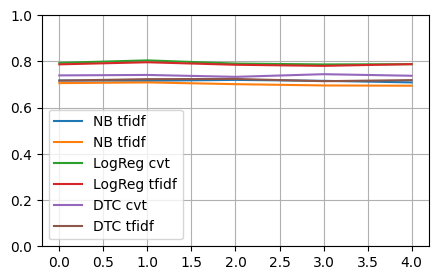

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5,3))

plt.plot(range(len(nb_cvt_pipeline_cv)), nb_cvt_pipeline_cv, label='NB tfidf')
plt.plot(range(len(nb_tfidf_pipeline_cv)), nb_tfidf_pipeline_cv, label='NB tfidf')
plt.plot(range(len(logreg_cvt_pipeline_cv)), logreg_cvt_pipeline_cv, label='LogReg cvt')
plt.plot(range(len(logreg_tfidf_pipeline_cv)), logreg_tfidf_pipeline_cv, label='LogReg tfidf')
plt.plot(range(len(dtc_cvt_pipeline_cv)), dtc_cvt_pipeline_cv, label='DTC cvt')
plt.plot(range(len(dtc_tfidf_pipeline_cv)), dtc_tfidf_pipeline_cv, label='DTC tfidf')


plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

In [ ]:
pd.DataFrame({'CV NB cvt': nb_cvt_pipeline_cv, 
              'CV NB tfidf': nb_tfidf_pipeline_cv,
              'CV LogReg cvt': logreg_cvt_pipeline_cv, 
              'CV LogReg tfidf': logreg_tfidf_pipeline_cv,
              'CV DTC cvt': dtc_cvt_pipeline_cv, 
              'CV DTC tfidf': dtc_tfidf_pipeline_cv}
             ).T

,0,1,2,3,4
CV NB cvt,0.717723,0.716760,0.720282,0.716173,0.709422
CV NB tfidf,0.706279,0.709422,0.701790,0.696214,0.695040
CV LogReg cvt,0.794014,0.804814,0.791018,0.787203,0.788377
CV LogReg tfidf,0.787559,0.796595,0.785735,0.781039,0.788377
CV DTC cvt,0.739730,0.741708,0.733490,0.744937,0.738186
CV DTC tfidf,0.717136,0.723510,0.724391,0.714705,0.719401


- Based on the score above, Logistic Regression is superior than others with CV Score for both Vectorizer almost reach 0.8.
- `CV LogReg cvt` is in the range of 78-80 and `CV LogReg tfidf` is in the range of 78-79
- I will use **Logistic Regression** as the model that will be processed to Hyperparameter Tuning
- Although, Logistic Regression with CountVectorizer is a bit higher than with TfidfVectorizer, I prefer to use Logistic Regression with TF-IDF since its encoding method considers the importance of meaningfull words in a context.

# PART 6: MODELLING - HYPERPARAMETER TUNING

##### Pipeline, CrossValidation, Hyperparameter Tuning

In [133]:
# text preprocessor
tf_idf_preprocessor = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 2))

# model
logreg = LogisticRegression(solver='lbfgs', class_weight='balanced')

# pipeline
sentiment_analyser_pipeline_tfidf = Pipeline([
    ('preprocessor', tf_idf_preprocessor),
    ('algo', logreg)
])

# crossvalidation
skfold = StratifiedKFold(n_splits=5)

# hyperparameter tuning
hyperparam_space_logreg = {
    'algo__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005], # benck mark 1 C = 1 bench mark 2 C = 0.05
    # 'algo__C': Real(low=-3, high=3, prior='log-uniform'),
    # 'algo__fit_intercept': [True, False],
    'algo__max_iter':[100, 200, 300, 400, 500, 1000], # bench mark max_iter = 100
}

# grid_search_logreg_hyper = GridSearchCV(
#     sentiment_analyser_pipe_tfidf,
#     param_grid = hyperparam_space_logreg,
#     cv = skfold,
#     scoring = 'recall_micro',
#     verbose = 1,
#     n_jobs = -1
# )

rand_search_logreg_hyper_tfidf = RandomizedSearchCV(
    sentiment_analyser_pipeline_tfidf,
    hyperparam_space_logreg,
    cv = skfold,
    n_iter=30,
    scoring = 'recall_micro',
    verbose = 1,
    n_jobs = -1
)

In [134]:
# grid_search_logreg_hyper.fit(text_train, y_train)
rand_search_logreg_hyper_tfidf.fit(text_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 27.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                         

In [135]:
print('estimator logreg tuned score:', rand_search_logreg_hyper_tfidf.best_score_)
print('estimator logreg best params:', rand_search_logreg_hyper_tfidf.best_params_)

estimator logreg tuned score: 0.8045315774895926
estimator logreg best params: {'algo__max_iter': 300, 'algo__C': 10}


              precision    recall  f1-score   support

          -1       0.80      0.81      0.80      2661
           0       0.74      0.85      0.79      1417
           1       0.86      0.79      0.83      3224

    accuracy                           0.81      7302
   macro avg       0.80      0.82      0.81      7302
weighted avg       0.81      0.81      0.81      7302



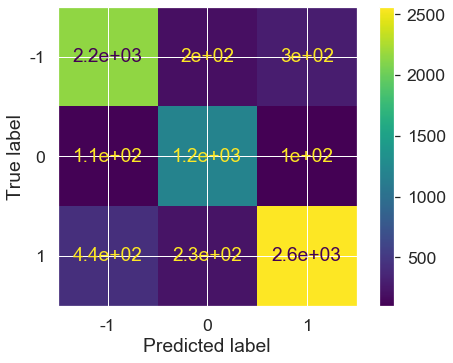

In [136]:
y_pred_logreg_hyper = rand_search_logreg_hyper_tfidf.predict(text_test)
print(classification_report(y_test, y_pred_logreg_hyper))
plot_confusion_matrix(rand_search_logreg_hyper_tfidf, text_test, y_test);

#### Save Model

In [ ]:
joblib.dump(rand_search_logreg_hyper_tfidf, 'rand_search_logreg_hyper_tfidf.joblib')

['rand_search_logreg_hyper_tfidf.joblib']

# PART 7: PREDICTION

## 7.1) Load Model

In [137]:
# directory_model = '/content/drive/My Drive/Colab Notebooks/COURSE - PURWADHIKA - Data Science & Machine Learning/Modul_4_Final_Project/Model/'
# model_load = joblib.load(directory_model + 'rand_search_logreg_hyper_tfidf.joblib')
model_load = joblib.load('Model/rand_search_logreg_hyper_tfidf.joblib')
model_load

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.2.post1 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.2.post1 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.2.post1 when using version

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                         

In [138]:
print('estimator logreg tuned score:', model_load.best_score_)
print('estimator logreg best params:', model_load.best_params_)

estimator logreg tuned score: 0.804531594714555
estimator logreg best params: {'algo__max_iter': 300, 'algo__C': 10}


## 7.2) Predict New Data from Social Media (Twitter)
- New data is real-time data that is captured from Twitter
- With free version of Twitter API, we can only get at a maximum of 100 data in the last 7 days

>#### Prepare Text Mining Function

In [139]:
# !pip install tweepy
# !pip install dateparser

In [140]:
import pandas as pd
import tweepy
import time
pd.set_option('display.max_colwidth', 1000)
import dateparser
from datetime import datetime

In [141]:
# api key
api_key = "VF9Xv4WxUBUBMrH2yntvW2DD0"
# api secret key
api_secret_key = "mzZU8SQUXHwYThBO0mtk3hkQG9JYhZ6byJoIjlwcBTagSG4Nkn"
# access token
access_token = "473787030-HUT2iebZltM6XjswhV7fnGpQerksZ5a7qaoyEJjp"
# access token secret
access_token_secret = "LkvliySmLd57Wt8LVVpy1nJ5jlRwaQo1wzfyh0epYzJ8d"

authentication = tweepy.OAuthHandler(api_key, api_secret_key)
authentication.set_access_token(access_token, access_token_secret)
api = tweepy.API(authentication, wait_on_rate_limit=True)

In [142]:
def get_profile_banner_url(i):
    if 'profile_banner_url' in i.user._json:
        return i.user.profile_banner_url
    else:
        return 'None' 
    
def get_news_url_2(i):
    if i.entities['urls'] == []:
        return 'None'
    else:
        return i.entities['urls'][0]['url']

def get_tweets(keyword='indonesia', location="-0.789275,113.921326,5000km", language='id'):
    # list to store tweets
    tweets_list = []
    # no of tweets
    count = 100
    # location
    location=location
    # lang
    language=language
    try:
        # Pulling individual tweets from query
        for tweet in api.search(q=keyword, geocode=location, count=count, lang=language):
            # print(tweet.text)
            # Adding to list that contains all tweets
            tweets_list.append({'tweet_id': tweet.id,
                                'user_name': tweet.user.name,
                                'screen_name': tweet.user.screen_name,
                                'profile_url': f"https://twitter.com/{tweet.user.screen_name}",
                                'created_at': tweet.created_at,
                                'tweet_text': tweet.text,
                                'location': tweet.user.location,
                                'followers': tweet.user.followers_count,
                                'following': tweet.user.friends_count,
                                'listed_count': tweet.user.listed_count,
                                'profile_image': tweet.user.profile_image_url,
                                'profile_banner_image': get_profile_banner_url(tweet),
                                'news_url_1': tweet.user.url,
                                'news_url_2': get_news_url_2(tweet)})
        # return tweets_list
        return pd.DataFrame.from_dict(tweets_list)

    except BaseException as e:
        print('failed on_status,', str(e))
        time.sleep(3)

>#### Generate New Text in DataFrame

In [62]:
new_df = get_tweets('asuransi')
print('total data: ', len(new_df))
new_df.head()

total data:  100


,tweet_id,user_name,screen_name,profile_url,created_at,tweet_text,location,followers,following,listed_count,profile_image,profile_banner_image,news_url_1,news_url_2
0,1383394663915134983,Media Konsumen,MediaKonsumenID,https://twitter.com/MediaKonsumenID,2021-04-17 12:19:24,Klausul Hangus Jika Berhenti di Tengah Jalan Tidak Tercantum di Polis Asuransi Proteksi Prima Medika - https://t.co/YvbcJjzELH,Indonesia,18167,773,18,http://pbs.twimg.com/profile_images/632629573335683073/SpL96WeN_normal.jpg,https://pbs.twimg.com/profile_banners/1117529034/1497424718,https://t.co/0o3q6CGhxs,https://t.co/YvbcJjzELH
1,1383392844400922627,Cris vino Batista,vinobatista,https://twitter.com/vinobatista,2021-04-17 12:12:10,"RT @KASIH43165348: @claracannn @entong373 @HermanMM6 @heffheven @agnezmo Babyy, jangan singgung asuransi entar ilustrasi berjalan 😅😅\n#Agnat…","Pancoran, Indonesia",24,88,0,http://pbs.twimg.com/profile_images/1345197188897378306/ar-eMt4o_normal.jpg,https://pbs.twimg.com/profile_banners/1336215496505479168/1609554976,None,None
2,1383387339662135303,Yus,iyusrnlianm,https://twitter.com/iyusrnlianm,2021-04-17 11:50:18,Bayar iuran b**s udah ky bayar asuransi ternama 😂 kaget adekk..,Indonesia,428,370,1,http://pbs.twimg.com/profile_images/1329450563436736512/OhalP1lj_normal.jpg,None,https://t.co/sGgdQaoFHr,None
3,1383385779846615053,Roiz Maul,roizdreamer,https://twitter.com/roizdreamer,2021-04-17 11:44:06,"RT @KASIH43165348: @claracannn @entong373 @HermanMM6 @heffheven @agnezmo Babyy, jangan singgung asuransi entar ilustrasi berjalan 😅😅\n#Agnat…","Rangkasbitung, Indonesia",236,79,1,http://pbs.twimg.com/profile_images/1374284719987118081/aBz0o4A6_normal.jpg,https://pbs.twimg.com/profile_banners/549088998/1593445211,https://t.co/MLBsRlyrt1,None
4,1383384627818033157,Pita,Phisparkyu,https://twitter.com/Phisparkyu,2021-04-17 11:39:31,@tigorsiagian perusahaan asuransi anak usaha dr bank plat merah skrg ini rajin menyusur ke daerah kampung mulai dr… https://t.co/kW9AFuYout,Indonesia,140,216,0,http://pbs.twimg.com/profile_images/1361652664874848262/LdoNRW5e_normal.jpg,https://pbs.twimg.com/profile_banners/143333038/1600771009,None,https://t.co/kW9AFuYout


>#### Predict New Text Data

>##### apply text_preprocessing

In [63]:
new_text_preprocessed = new_df['tweet_text'].apply(lambda x: text_preprocessing(x))
new_df['new_text_preprocessed'] = new_text_preprocessed
new_df

,tweet_id,user_name,screen_name,profile_url,created_at,tweet_text,location,followers,following,listed_count,profile_image,profile_banner_image,news_url_1,news_url_2,new_text_preprocessed
0,1383394663915134983,Media Konsumen,MediaKonsumenID,https://twitter.com/MediaKonsumenID,2021-04-17 12:19:24,Klausul Hangus Jika Berhenti di Tengah Jalan Tidak Tercantum di Polis Asuransi Proteksi Prima Medika - https://t.co/YvbcJjzELH,Indonesia,18167,773,18,http://pbs.twimg.com/profile_images/632629573335683073/SpL96WeN_normal.jpg,https://pbs.twimg.com/profile_banners/1117529034/1497424718,https://t.co/0o3q6CGhxs,https://t.co/YvbcJjzELH,klausul hangus henti jalan tidak cantum polis asuransi proteksi prima medika httpstcoyvbcjjzelh
1,1383392844400922627,Cris vino Batista,vinobatista,https://twitter.com/vinobatista,2021-04-17 12:12:10,"RT @KASIH43165348: @claracannn @entong373 @HermanMM6 @heffheven @agnezmo Babyy, jangan singgung asuransi entar ilustrasi berjalan 😅😅\n#Agnat…","Pancoran, Indonesia",24,88,0,http://pbs.twimg.com/profile_images/1345197188897378306/ar-eMt4o_normal.jpg,https://pbs.twimg.com/profile_banners/1336215496505479168/1609554976,None,None,rt kasih claracannn entong hermanmm heffheven agnezmo babyy jangan singgung asuransi entar ilustrasi jalan agnat
2,1383387339662135303,Yus,iyusrnlianm,https://twitter.com/iyusrnlianm,2021-04-17 11:50:18,Bayar iuran b**s udah ky bayar asuransi ternama 😂 kaget adekk..,Indonesia,428,370,1,http://pbs.twimg.com/profile_images/1329450563436736512/OhalP1lj_normal.jpg,None,https://t.co/sGgdQaoFHr,None,bayar iur bayar asuransi nama face with tears of joy kaget adekk
3,1383385779846615053,Roiz Maul,roizdreamer,https://twitter.com/roizdreamer,2021-04-17 11:44:06,"RT @KASIH43165348: @claracannn @entong373 @HermanMM6 @heffheven @agnezmo Babyy, jangan singgung asuransi entar ilustrasi berjalan 😅😅\n#Agnat…","Rangkasbitung, Indonesia",236,79,1,http://pbs.twimg.com/profile_images/1374284719987118081/aBz0o4A6_normal.jpg,https://pbs.twimg.com/profile_banners/549088998/1593445211,https://t.co/MLBsRlyrt1,None,rt kasih claracannn entong hermanmm heffheven agnezmo babyy jangan singgung asuransi entar ilustrasi jalan agnat
4,1383384627818033157,Pita,Phisparkyu,https://twitter.com/Phisparkyu,2021-04-17 11:39:31,@tigorsiagian perusahaan asuransi anak usaha dr bank plat merah skrg ini rajin menyusur ke daerah kampung mulai dr… https://t.co/kW9AFuYout,Indonesia,140,216,0,http://pbs.twimg.com/profile_images/1361652664874848262/LdoNRW5e_normal.jpg,https://pbs.twimg.com/profile_banners/143333038/1600771009,None,https://t.co/kW9AFuYout,tigorsiagian usaha asuransi anak usaha dr bank plat merah skrg rajin susur daerah kampung dr httpstcokwafuyout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1382891500615335937,Asuransi Astra,_AsuransiAstra,https://twitter.com/_AsuransiAstra,2021-04-16 03:00:01,Asuransi Syariah adalah sebuah sistem dimana para peserta saling menanggung risiko (sharing of risk) dgn menghibahk… https://t.co/WDBxX4Zo0e,Indonesia,1859,983,5,http://pbs.twimg.com/profile_images/1069873650591887360/fjdkWvj5_normal.jpg,https://pbs.twimg.com/profile_banners/896898032/1589250962,https://t.co/8XC0JLpG1K,https://t.co/WDBxX4Zo0e,asuransi syariah sistem mana serta tanggung risiko sharing risk menghibahk httpstcowdbxxzoe
96,1382878870785851394,Qoala,qoala_app,https://twitter.com/qoala_app,2021-04-16 02:09:50,5 Manfaat Asuransi dalam Bisnis untuk Melindungi Usahamu\n\nhttps://t.co/8PkETS12Su,Indonesia,138,0,2,http://pbs.twimg.com/profile_images/1166550407235153922/wqUbVe5l_normal.jpg,https://pbs.twimg.com/profile_banners/1163278273909886976/1600244246,https://t.co/Ju7JN9TxLa,https://t.co/8PkETS12Su,manfaat asuransi bisnis lindung usaha httpstcopketssu
97,1382877409440006144,LIFEfriend.id,LIFEfriend_id,https://twitter.com/LIFEfriend_id,2021-04-16 02:04:01,Asuransi Jiwa Terbaik Di Mahakam Ulu; Inil Dia Ciri-Cirinya! ... [SELENGKAPNYA] #asuransijiwa,Indonesia,4,51,0,http://pbs.twimg.com/profile_images/1189

>##### apply model_load

In [64]:
y_pred_new_text_preprocessed = model_load.predict(new_text_preprocessed)
y_pred_new_text_preprocessed

array([-1,  1,  0,  1,  1,  1, -1, -1,  1,  0, -1,  1, -1,  1, -1,  1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  0,  1, -1,  1,
       -1, -1,  0,  1,  1,  0, -1, -1,  0, -1,  1, -1, -1,  1,  0,  0,  0,
        0, -1,  1, -1, -1, -1,  1,  1,  0,  0,  0,  1,  0,  0, -1,  0, -1,
       -1,  1,  1, -1,  1,  1, -1,  0, -1, -1,  1, -1, -1, -1,  1, -1,  0,
       -1, -1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1,  1,  0, -1],
      dtype=int64)

In [67]:
# y_pred_new_text_preprocessed_proba = model_load.predict_proba(new_text_preprocessed)
# y_pred_new_text_preprocessed_proba

In [65]:
new_df['sentiment'] = y_pred_new_text_preprocessed
new_df

,tweet_id,user_name,screen_name,profile_url,created_at,tweet_text,location,followers,following,listed_count,profile_image,profile_banner_image,news_url_1,news_url_2,new_text_preprocessed,sentiment
0,1383394663915134983,Media Konsumen,MediaKonsumenID,https://twitter.com/MediaKonsumenID,2021-04-17 12:19:24,Klausul Hangus Jika Berhenti di Tengah Jalan Tidak Tercantum di Polis Asuransi Proteksi Prima Medika - https://t.co/YvbcJjzELH,Indonesia,18167,773,18,http://pbs.twimg.com/profile_images/632629573335683073/SpL96WeN_normal.jpg,https://pbs.twimg.com/profile_banners/1117529034/1497424718,https://t.co/0o3q6CGhxs,https://t.co/YvbcJjzELH,klausul hangus henti jalan tidak cantum polis asuransi proteksi prima medika httpstcoyvbcjjzelh,-1
1,1383392844400922627,Cris vino Batista,vinobatista,https://twitter.com/vinobatista,2021-04-17 12:12:10,"RT @KASIH43165348: @claracannn @entong373 @HermanMM6 @heffheven @agnezmo Babyy, jangan singgung asuransi entar ilustrasi berjalan 😅😅\n#Agnat…","Pancoran, Indonesia",24,88,0,http://pbs.twimg.com/profile_images/1345197188897378306/ar-eMt4o_normal.jpg,https://pbs.twimg.com/profile_banners/1336215496505479168/1609554976,None,None,rt kasih claracannn entong hermanmm heffheven agnezmo babyy jangan singgung asuransi entar ilustrasi jalan agnat,1
2,1383387339662135303,Yus,iyusrnlianm,https://twitter.com/iyusrnlianm,2021-04-17 11:50:18,Bayar iuran b**s udah ky bayar asuransi ternama 😂 kaget adekk..,Indonesia,428,370,1,http://pbs.twimg.com/profile_images/1329450563436736512/OhalP1lj_normal.jpg,None,https://t.co/sGgdQaoFHr,None,bayar iur bayar asuransi nama face with tears of joy kaget adekk,0
3,1383385779846615053,Roiz Maul,roizdreamer,https://twitter.com/roizdreamer,2021-04-17 11:44:06,"RT @KASIH43165348: @claracannn @entong373 @HermanMM6 @heffheven @agnezmo Babyy, jangan singgung asuransi entar ilustrasi berjalan 😅😅\n#Agnat…","Rangkasbitung, Indonesia",236,79,1,http://pbs.twimg.com/profile_images/1374284719987118081/aBz0o4A6_normal.jpg,https://pbs.twimg.com/profile_banners/549088998/1593445211,https://t.co/MLBsRlyrt1,None,rt kasih claracannn entong hermanmm heffheven agnezmo babyy jangan singgung asuransi entar ilustrasi jalan agnat,1
4,1383384627818033157,Pita,Phisparkyu,https://twitter.com/Phisparkyu,2021-04-17 11:39:31,@tigorsiagian perusahaan asuransi anak usaha dr bank plat merah skrg ini rajin menyusur ke daerah kampung mulai dr… https://t.co/kW9AFuYout,Indonesia,140,216,0,http://pbs.twimg.com/profile_images/1361652664874848262/LdoNRW5e_normal.jpg,https://pbs.twimg.com/profile_banners/143333038/1600771009,None,https://t.co/kW9AFuYout,tigorsiagian usaha asuransi anak usaha dr bank plat merah skrg rajin susur daerah kampung dr httpstcokwafuyout,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1382891500615335937,Asuransi Astra,_AsuransiAstra,https://twitter.com/_AsuransiAstra,2021-04-16 03:00:01,Asuransi Syariah adalah sebuah sistem dimana para peserta saling menanggung risiko (sharing of risk) dgn menghibahk… https://t.co/WDBxX4Zo0e,Indonesia,1859,983,5,http://pbs.twimg.com/profile_images/1069873650591887360/fjdkWvj5_normal.jpg,https://pbs.twimg.com/profile_banners/896898032/1589250962,https://t.co/8XC0JLpG1K,https://t.co/WDBxX4Zo0e,asuransi syariah sistem mana serta tanggung risiko sharing risk menghibahk httpstcowdbxxzoe,-1
96,1382878870785851394,Qoala,qoala_app,https://twitter.com/qoala_app,2021-04-16 02:09:50,5 Manfaat Asuransi dalam Bisnis untuk Melindungi Usahamu\n\nhttps://t.co/8PkETS12Su,Indonesia,138,0,2,http://pbs.twimg.com/profile_images/1166550407235153922/wqUbVe5l_normal.jpg,https://pbs.twimg.com/profile_banners/1163278273909886976/1600244246,https://t.co/Ju7JN9TxLa,https://t.co/8PkETS12Su,manfaat asuransi bisnis lindung usaha httpstcopketssu,1
97,1382877409440006144,LIFEfriend.id,LIFEfriend_id,https://twitter.com/LIFEfriend_id,2021-04-16 02:04:01,Asuransi Jiwa Terbaik Di Mahakam Ulu; Inil Dia Ciri-Cirinya! ... [SELENGKAPNYA] #asuransijiwa,Indonesia,4,51,0,http://pbs

- Model has successfully predict the new text within two main steps:
    1. Text Preprocessing
    1. Model Prediction
  Of the the two steps, text preprocessing can take up to 30 seconds for predicting 100 data.
  As mentioned above, it is due to Sastrawi's stemmer.
- These two steps will be continued to deployment on Social Sentiment Dashboard

# END